In [1]:
# Select Design Tool 

maproom = "djibouti"

In [2]:
# Update Season and Country in Title
# Change output file

In [3]:
# Loading Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils as u
import warnings

In [4]:
# Suppress FutureWarning specifically
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
# Load Country Variables

config = u.load_config()

# Accessing values for the specified maproom

country_config = config.get("maprooms", {}).get(maproom, {})

# Access individual values using the 'maproom' variable

country = country_config.get("country")
modes = country_config.get("mode", [])
season = country_config.get("season")
target_season = country_config.get("target_season")
issue_month = country_config['issue_month']
predictor = country_config['predictor']
include_upcoming = country_config['include_upcoming']
design_tool = country_config['design_tool']
report = country_config['report']
username = country_config['username']
password = country_config['password']
threshold_protocol = country_config['threshold_protocol']
need_valid_keys = country_config['need_valid_keys']
valid_keys = country_config['admin1_list']
username = country_config['username']
password = country_config['password']
year = country_config['year'] 
frequencies = country_config['freq']
predictand_rain = country_config['predictand_rain']
predictand_badyears = country_config['predictand_badyears']

# Convert each frequency to a string with a '%' sign
correct_order = [f"{freq}%" for freq in frequencies]

## Introduction and Objectives

### Purpose
The Jupyter Notebook aims to support the forecast review.

### Audience
Tailored for government officials in agriculture, water resources, and disaster management sectors.

### Objectives
To provide an in-depth analysis of the forecast using the Design Tool API.

### Forecast Analysis

The Jupyter Notebook analyzes and visualizes critical metrics across different frequencies for each administrative name within a dataset. These metrics help evaluate the performance of the forecast for decision-making. Here's a summary of what each metric represents and how they are derived:

| Observed             | Drought                                     | No Drought                                       |                                   |
|----------------------|---------------------------------------------|--------------------------------------------------|-----------------------------------|
| **Forecast**         |                                             |                                                  |                                   |
| Drought              | a = hit (Worthy Action)                     | b = false alarm (Act in Vain)                    | a + b = forecast drought          |
|                      |                                             |                                                  |                                   |
| No Drought           | c = missed (Fail to Act)                    | d = correct rejection (Worthy Inaction)          | c + d = forecast no drought       |
|                      |                                             |                                                  |                                   |
|                      | a + c = observed drought                    | b + d = observed no drought                      |                                   |

#### Metric 1: Hit rate (HR)
The hit rate (HR) index represents the number of hits divided by the total number of events observed and therefore describes the fraction of the observed drought events that were correctly forecast. The HR index can range from 0 to 1 (perfect score), and extracted as follow:

$$
HR = \frac{a}{a + c}
$$

Where:
- \( a \) = hits (Worthy Action)
- \( c \) = misses (Fail to Act)

(1)

#### Metric 2: False alarm ratio (FAR)
The False Alarm Ratio is a measure of the proportion of non-drought events per total number of drought warnings (Equation (2)). In drought seasonal forecasting it is important to have a certain balance between over reporting a potential drought versus the pitfall of not issuing an alarm when a drought can in fact happen. A low FAR is preferable, but the decision-maker should have in mind the socio-economic implications of missing an actual drought event.

$$
FAR = \frac{b}{a + b}
$$

Where:
- \( b \) = false alarms (Act in Vain)
- \( a \) = hits (Worthy Action)

(2)

#### Metric 3: Bias score (BS)
The Bias score identifies whether the forecast system tends to under forecast (BS < 1) or over forecast (BS > 1) the occurrence of drought events. In other words, the bias score answers the question of how did the forecasted frequency of droughts events compare to the observed frequency of drought events? The ideal value of the bias score is 1. This metric can be derived applying the following equation:

$$
BS = \frac{a + b}{a + c}
$$

Where:
- \( a \) = hits (Worthy Action)
- \( b \) = false alarms (Act in Vain)
- \( c \) = misses (Fail to Act)
(3)

#### Metric 4: Hanssen-Kuipers score (KSS)
The Hanssen-Kuipers score, also known as the true skill statistic, measures the difference between the hit rate and the false alarm rate (Equation (4)). The KSS measures the ability of the forecast to distinguish between occurrences and non-occurrences of droughts (Mason, 2018). The Hanssen-Kuipers Score ranges from −1 to 1.


$$
KSS = HR - FAR = \frac{ad - bc}{(a + c)(b + d)}
$$

Where:
- \( a \) = hits (Worthy Action)
- \( b \) = false alarms (Act in Vain)
- \( c \) = misses (Fail to Act)
- \( d \) = correct rejections (Worthy Inaction)

(4)

#### Metric 5: Heidke skill score (HSS)
The Heidke Skill score measures the fraction of correct forecasts after eliminating those forecasts which would be correct due to random chance (Mason, 2018). The HSS index can describe the accuracy of the forecast relative to that of random chance ranging from minus infinite to 1 (Equation (5)). A negative value indicates that a forecast is worse than a guess, whereas 0 and 1 values indicate no and perfect skill, respectively.

$$
HSS = \frac{2(ad - bc)}{(a + c)(c + d) + (a + b)(b + d)}
$$

Where:
- \( a \) = hits (Worthy Action)
- \( b \) = false alarms (Act in Vain)
- \( c \) = misses (Fail to Act)
- \( d \) = correct rejections (Worthy Inaction)
(5)

#### Classification of Forecast Accuracy Based on HR and FAR

The performance of the forecasts is classified based on two metrics: Hit Rate (HR) and False Alarm Ratio (FAR). These classifications help in understanding the accuracy and reliability of the forecasts by categorizing them into three categories: 'Good', 'Moderate', and 'Bad'. This classification is critical for decision-making processes where the cost of false positives and false negatives can be significant.

##### Classification Criteria
The classification into 'Good', 'Moderate', and 'Bad' is determined by comparing the values of HR and FAR against each other and a specified threshold. The threshold is set to a default value of 0.6 but can be adjusted based on specific requirements. The classification criteria are as follows:

1. Good: The forecast is classified as 'Good' if the HR is greater than both the FAR and the threshold. This implies a high accuracy in predicting true events with few false alarms.
1. Moderate: The forecast is classified as 'Moderate' if the HR is greater than or equal to the FAR but less than the threshold. This indicates that the forecast system is reasonably accurate but not robust enough to meet the threshold criteria.
1. Bad: The forecast is classified as 'Bad' if the FAR is greater than the HR, suggesting that the forecast system has a higher rate of false alarms compared to correct predictions.


#### IMPORTANT - DISCLAIMER AND RIGHTS STATEMENT

This is a set of scripts written by the Financial Instruments Team at The National Center for Disaster Preparedness (NCDP), Columbia Climate School, at Columbia University. They are shared for educational purposes only.  Anyone who uses this code or its functionality or structure assumes full liability and should inform and credit NCDP.

Source - [Forecasting, thresholds, and triggers: Towards developing a Forecast-based Financing system for droughts in Mozambique](https://www.sciencedirect.com/science/article/pii/S2405880723000055)

In [6]:
### Decision Maptool

markdown_content = f"## Design Tool {target_season} Season \n\n {design_tool} "
print(markdown_content)


## Design Tool JAS Season 

 https://iridl.ldeo.columbia.edu/fbfmaproom2/djibouti 


### Design Tool API Variable Description

1. Admin Name: The name of the administrative region.
1. Year: Bad Years collected during the stakeholder workshop.
1. Frequency (%): The frequency percentage, indicates the likelihood of a certain event happening.
1. Issue Month: The month when the forecast was issued.
1. Forecast: The forecasted value.
1. Forecast Threshold: The threshold value above or below which a forecasted event is considered significant.
1. Trigger Difference: The difference between the forecast and the threshold.
1. Forecast Accuracy (%): The accuracy percentage of the forecast.
1. Triggered: Indicates whether the forecasted event met the criteria to be considered significant.
1. Adjusted Forecast Threshold: An adjusted threshold value for the forecast.
1. Threshold Protocol: A numeric representation of the protocol used for setting thresholds.
1. Triggered Adjusted: Indicates whether the forecasted event met the criteria to be considered significant based on the adjusted threshold.
1. Act in Vain: The number of actions taken that were unnecessary.
1. Fail to Act: The number of times a necessary action was not taken.
1. Worthy Action: The number of actions taken that were justified.
1. Worthy Inaction: The number of times inaction was the correct decision.
1. Design Tool URL: A URL to a design tool related to the forecast.

# National

In [7]:
admin_level = "national"
mode = 0

### Skill Metrics Against Rainfall

In [8]:
# Calling the Design tool API

admin_tables = u.get_trigger_tables(maproom=maproom, mode=mode, season=season, predictor=predictor, bad_years = year,
                                              predictand=predictand_rain, year = year, issue_month=issue_month, frequencies=frequencies,
                                              include_upcoming=include_upcoming, threshold_protocol=threshold_protocol,
                                              username=username, password=password,need_valid_keys=need_valid_keys,
                                              valid_keys=valid_keys)

combined_admin = pd.concat(admin_tables[f"admin{mode}_tables"].values(), ignore_index=True)

# Reorder the categories
combined_admin['Frequency (%)'] = combined_admin['Frequency (%)'].astype('category')
combined_admin['Frequency (%)'] = combined_admin['Frequency (%)'].cat.reorder_categories(correct_order, ordered=True)

u.style_and_render_df_with_hyperlinks(combined_admin)

,Admin Name,Year,Frequency (%),Issue Month,Forecast,Forecast Threshold,Trigger Difference,Forecast Accuracy (%),Triggered,Adjusted Forecast Threshold,Threshold Protocol,Triggered Adjusted,Act in Vain,Fail to Act,Worthy Action,Worthy Inaction,Design Tool URL
0,Djibouti,2023,15%,Jun,17.45,26.84,-9.39,81.25%,False,26.84,0,False,3.0,3.0,1.0,25.0,Design Tool Link
1,Djibouti,2023,15%,May,17.56,23.62,-6.06,75.00%,False,23.62,0,False,4.0,4.0,0.0,24.0,Design Tool Link
2,Djibouti,2023,15%,Apr,18.69,23.67,-4.98,81.25%,False,23.67,0,False,3.0,3.0,1.0,25.0,Design Tool Link
3,Djibouti,2023,25%,Jun,24.47,28.24,-3.77,78.12%,False,28.24,0,False,4.0,3.0,4.0,21.0,Design Tool Link
4,Djibouti,2023,25%,May,25.21,27.75,-2.54,71.88%,False,27.75,0,False,5.0,4.0,3.0,20.0,Design Tool Link
5,Djibouti,2023,25%,Apr,26.00,29.17,-3.17,71.88%,False,29.17,0,False,5.0,4.0,3.0,20.0,Design Tool Link
6,Djibouti,2023,35%,Jun,33.12,35.75,-2.62,78.12%,False,35.75,0,False,4.0,3.0,7.0,18.0,Design Tool Link
7,Djibouti,2023,35%,May,34.68,35.89,-1.21,65.62%,False,35.89,0,False,6.0,5.0,5.0,16.0,Design Tool Link
8,Djibouti,2023,35%,Apr,34.84,37.86,-3.02,71.88%,False,37.86,0,False,5.0,4.0,6.0,17.0,Design Tool Link
9,Djibouti,2023,40%,Jun,37.92,40.07,-2.15,81.25%,False,40.07,0,False,3.0,3.0,9.0,17.0,Design Tool Link


#### Metrics Table

In [9]:
# Group the data by 'Frequency (%)' and 'Admin Name'
grouped_data = combined_admin.groupby(['Frequency (%)', 'Admin Name', 'Issue Month'], observed=True).agg({
    'Worthy Action': lambda x: x.unique()[0],
    'Act in Vain': lambda x: x.unique()[0],
    'Worthy Inaction': lambda x: x.unique()[0],
    'Fail to Act': lambda x: x.unique()[0]
}).reset_index()

grouped_data = u.calculate_forecast_metrics(grouped_data)

u.format_forecast_metrics(grouped_data)

,Frequency (%),Admin Name,Issue Month,Worthy Action,Act in Vain,Worthy Inaction,Fail to Act,Hit Rate (HR),False Alarm Ratio (FAR),Bias Score (BS),Hanssen-Kuipers Score (KSS),Heidke Skill Score (HSS)
0,15%,Djibouti,Apr,1.0,3.0,25.0,3.0,0.25,0.75,1.00,-0.50,0.14
1,15%,Djibouti,Jun,1.0,3.0,25.0,3.0,0.25,0.75,1.00,-0.50,0.14
2,15%,Djibouti,May,0.0,4.0,24.0,4.0,0.00,1.00,1.00,-1.00,-0.14
3,25%,Djibouti,Apr,3.0,5.0,20.0,4.0,0.43,0.62,1.14,-0.20,0.22
4,25%,Djibouti,Jun,4.0,4.0,21.0,3.0,0.57,0.50,1.14,0.07,0.39
5,25%,Djibouti,May,3.0,5.0,20.0,4.0,0.43,0.62,1.14,-0.20,0.22
6,35%,Djibouti,Apr,6.0,5.0,17.0,4.0,0.60,0.45,1.10,0.15,0.36
7,35%,Djibouti,Jun,7.0,4.0,18.0,3.0,0.70,0.36,1.10,0.34,0.50
8,35%,Djibouti,May,5.0,6.0,16.0,5.0,0.50,0.55,1.10,-0.05,0.22
9,40%,Djibouti,Apr,9.0,3.0,17.0,3.0,0.75,0.25,1.00,0.50,0.60


In [10]:
grouped_data.to_csv(f"data/metrics{country}_{target_season}_{predictand_rain}_{admin_level}.csv", index=False)

#### Metrics Summary Statistics

In [11]:
summary_stats = grouped_data.describe().round(2)

summary_stats

,Worthy Action,Act in Vain,Worthy Inaction,Fail to Act,Hit Rate (HR),False Alarm Ratio (FAR),Bias Score (BS),Hanssen-Kuipers Score (KSS),Heidke Skill Score (HSS)
count,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00
mean,4.67,4.08,19.67,3.58,0.49,0.54,1.06,-0.05,0.31
std,3.17,1.00,3.42,0.67,0.23,0.23,0.07,0.46,0.22
min,0.00,3.00,16.00,3.00,0.00,0.25,1.00,-1.00,-0.14
25%,2.50,3.00,17.00,3.00,0.38,0.36,1.00,-0.27,0.20
50%,4.50,4.00,19.00,3.50,0.54,0.52,1.05,0.01,0.29
75%,7.25,5.00,21.75,4.00,0.68,0.66,1.11,0.33,0.48
max,9.00,6.00,25.00,5.00,0.75,1.00,1.14,0.50,0.60


#### Confusion Matrix vs Frequency

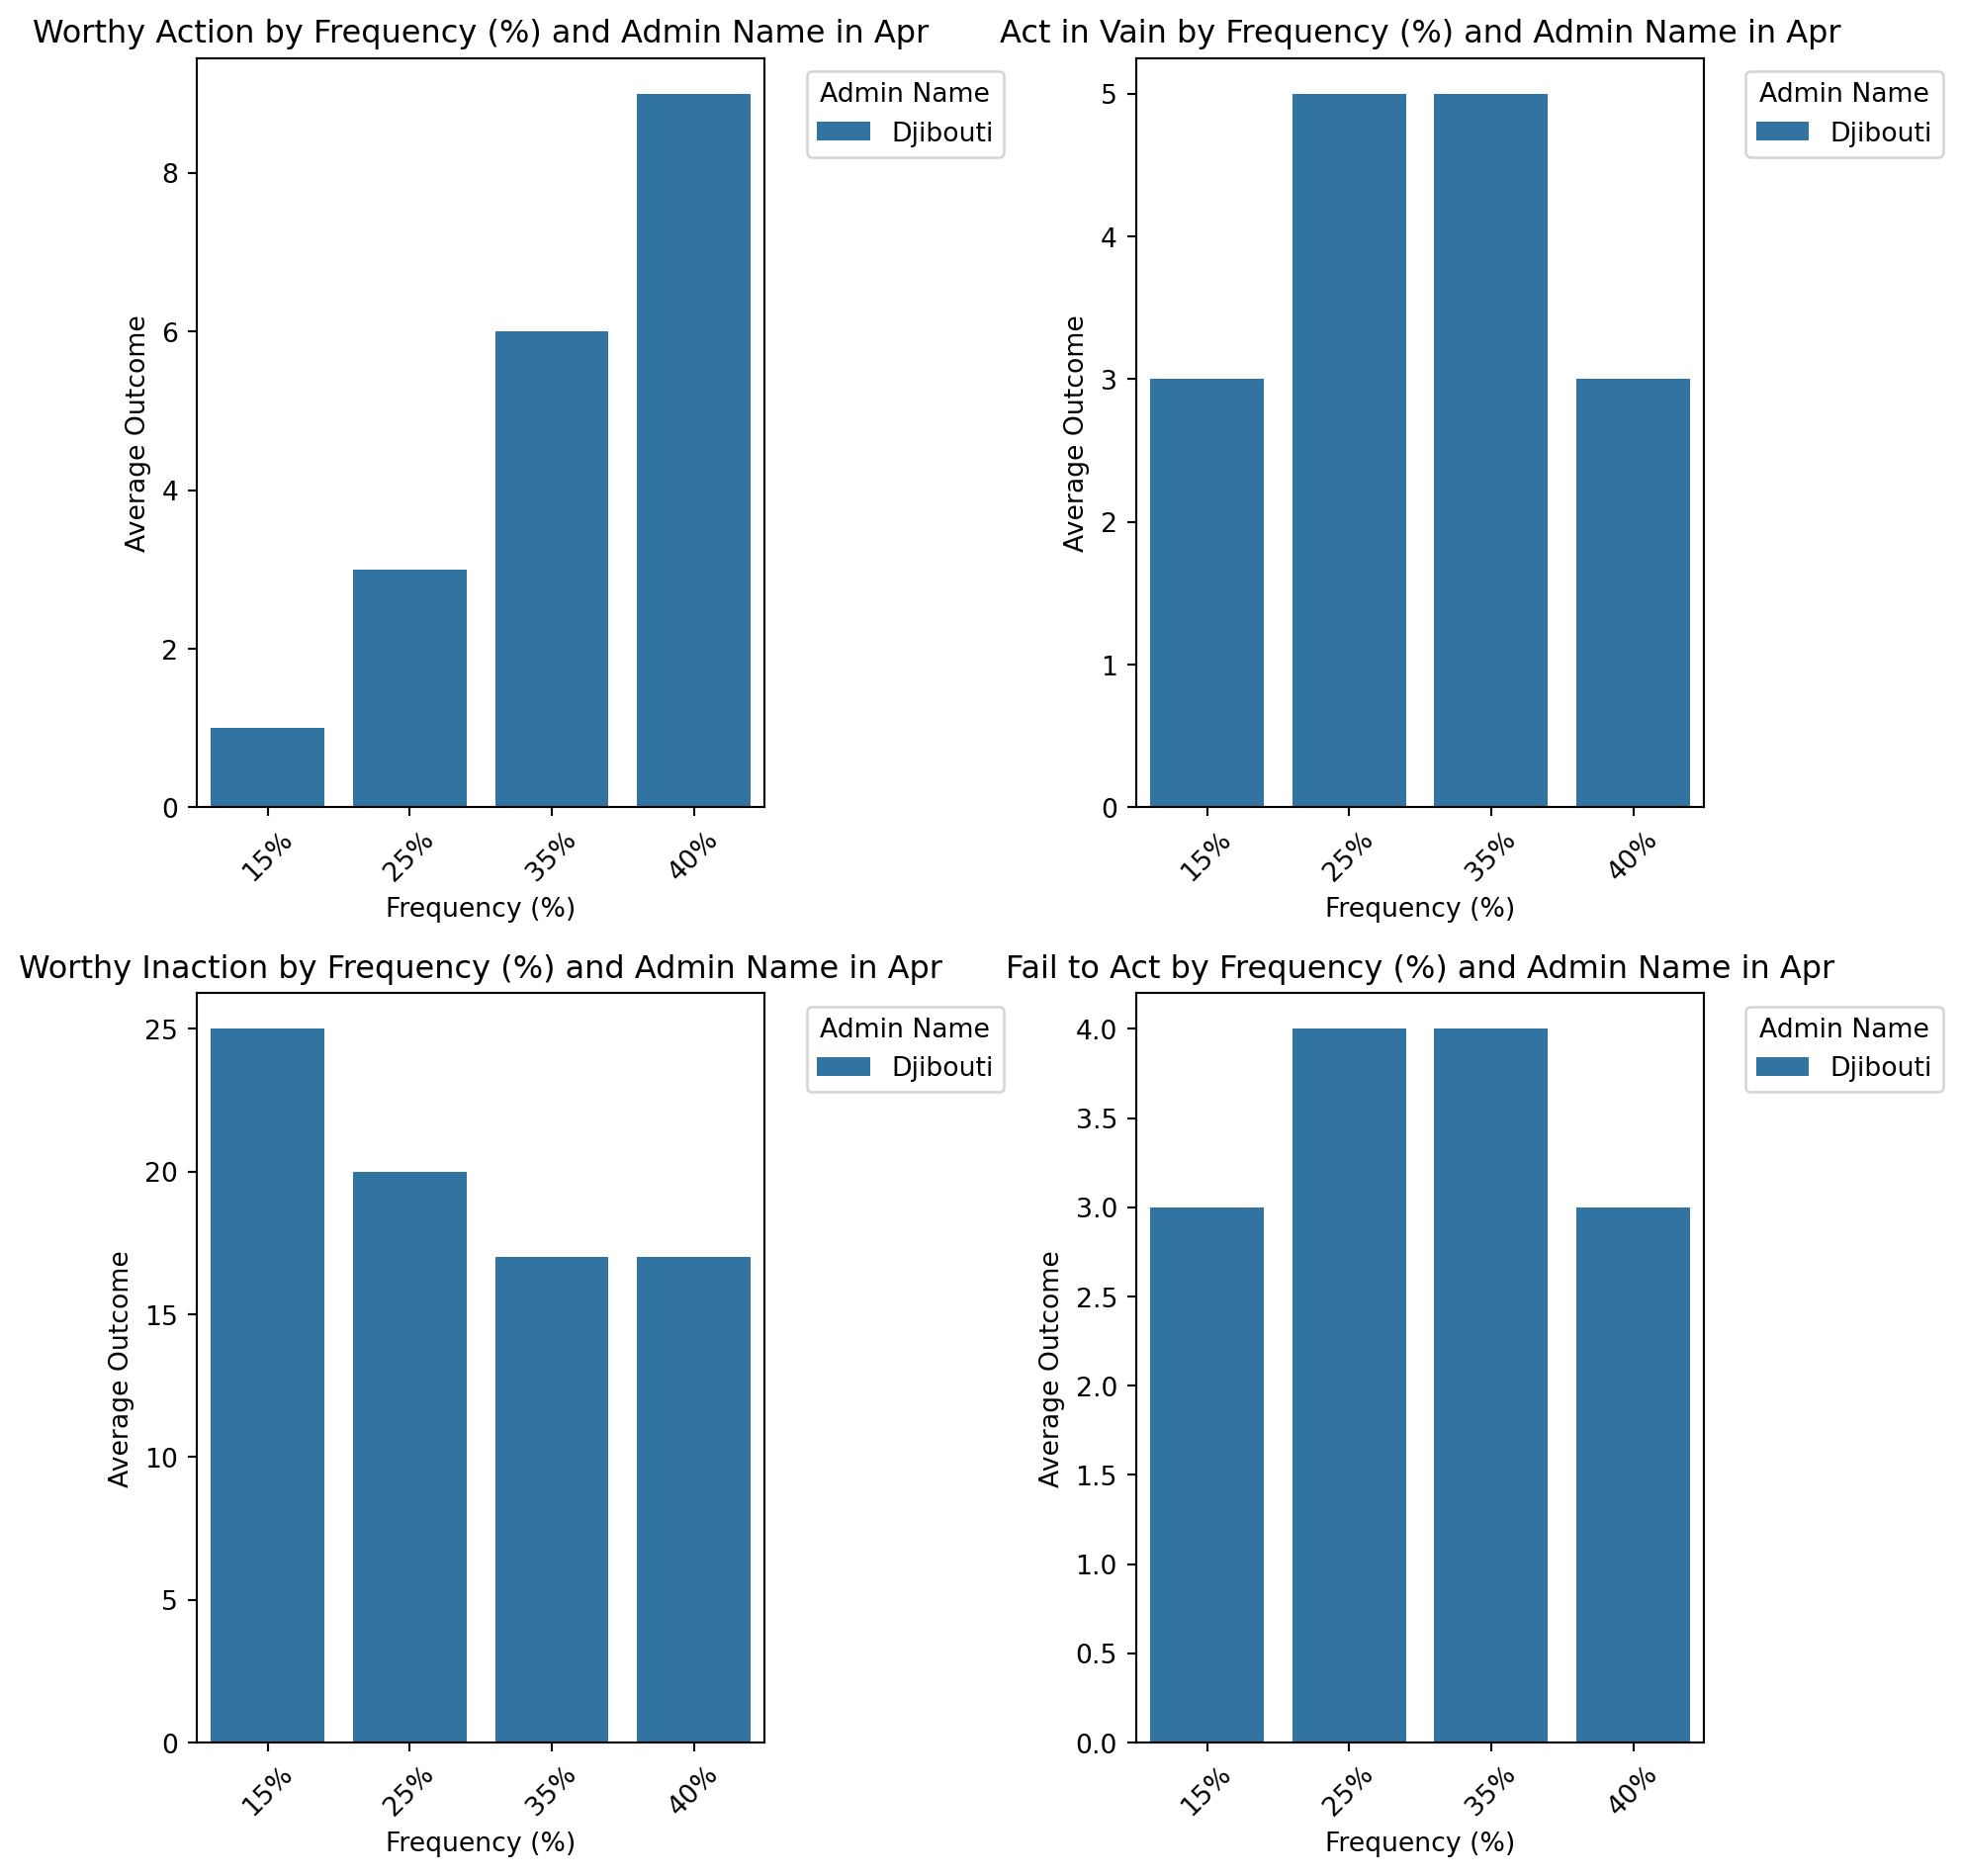

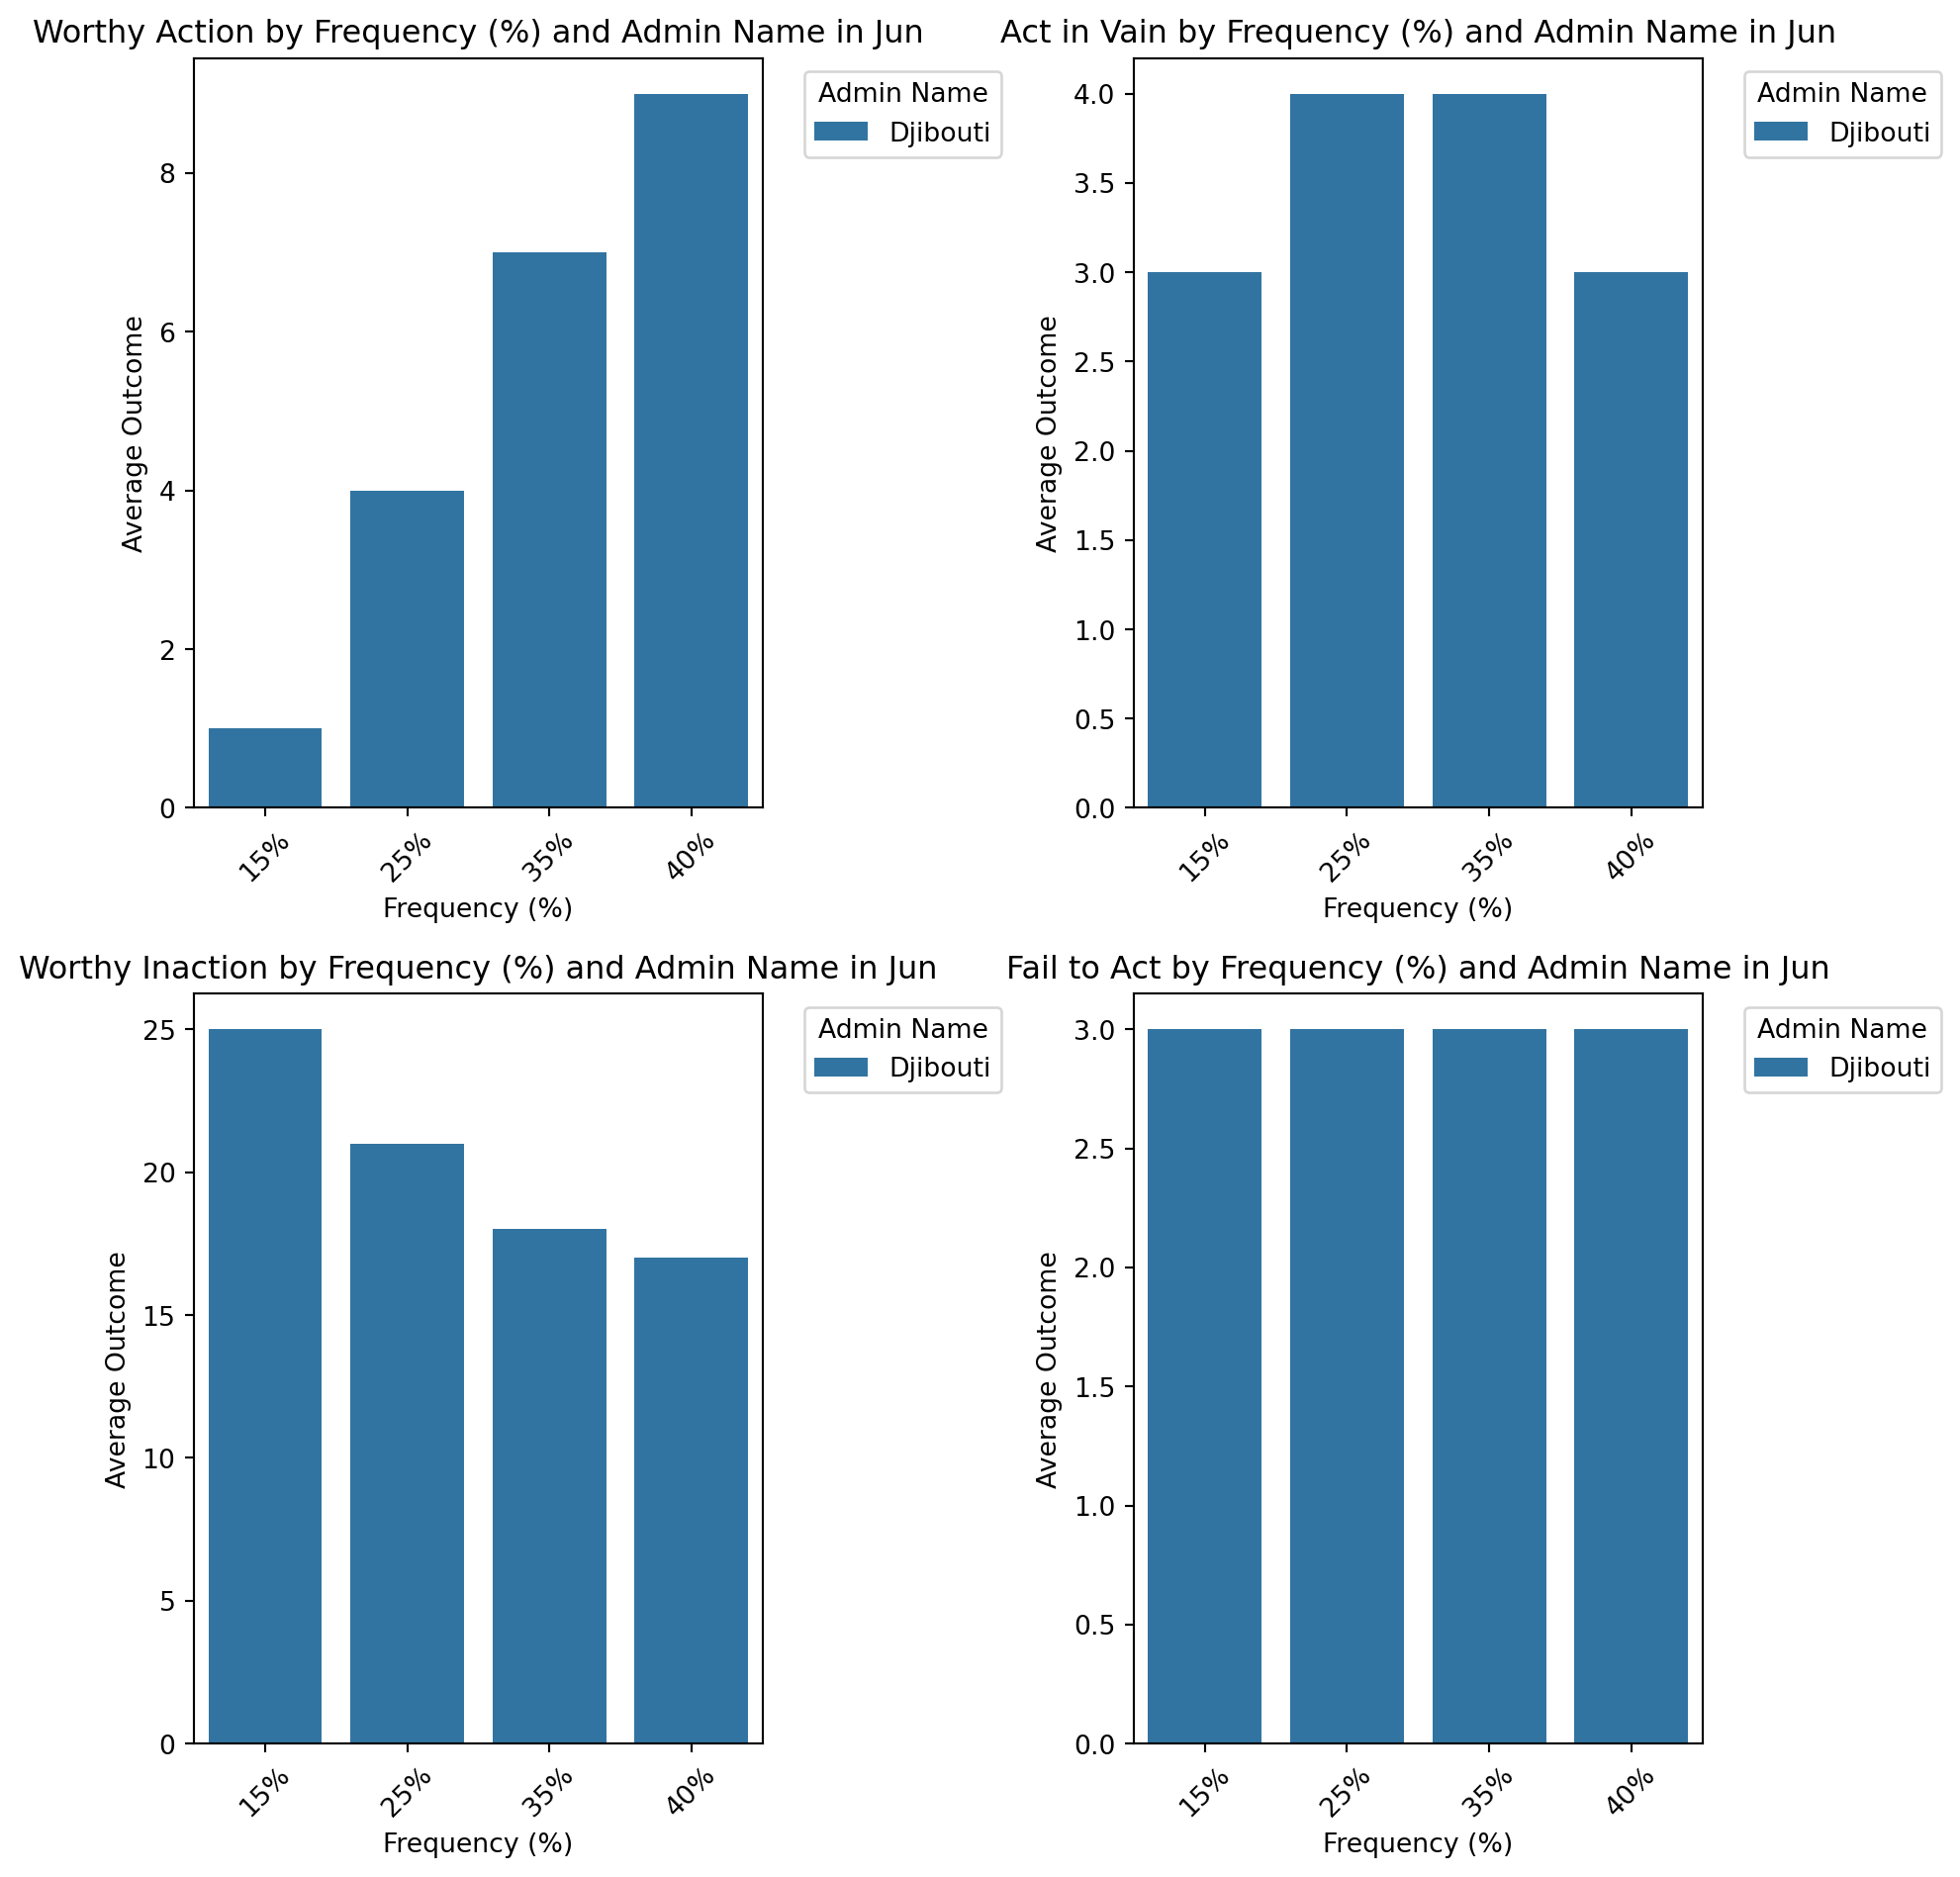

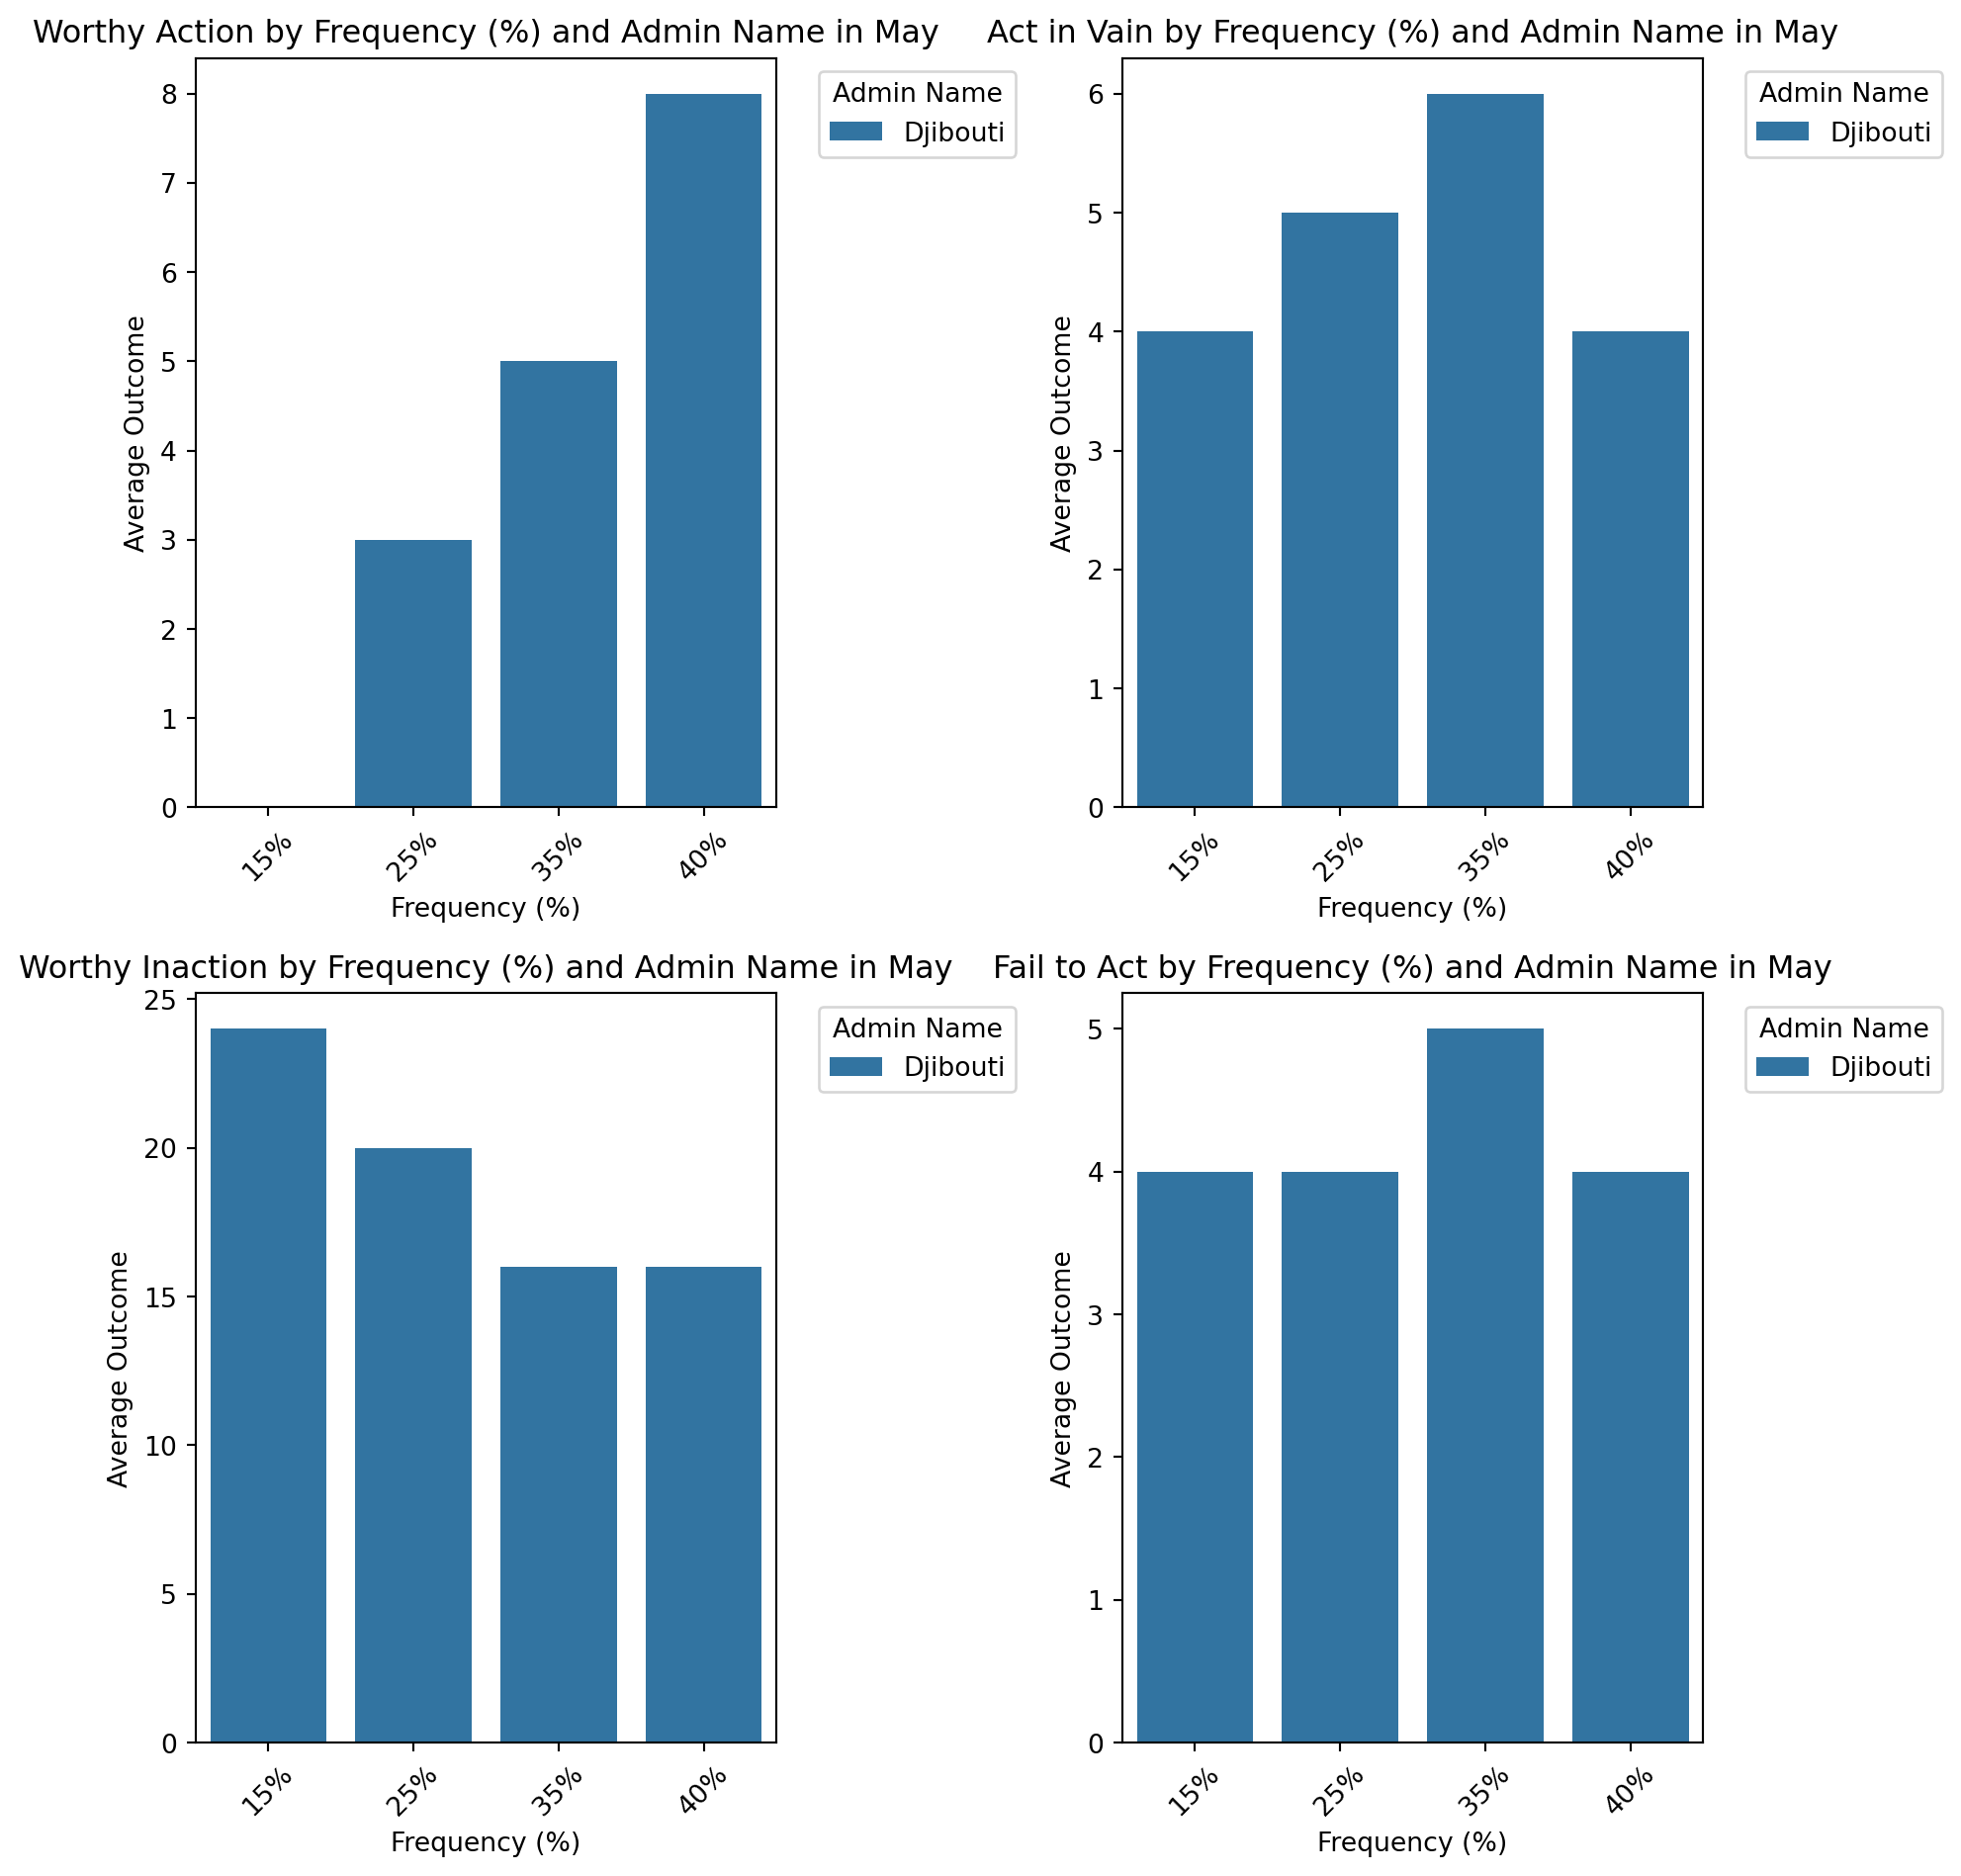

In [12]:
# Visualize Decision Outcomes for each frequency

u.visualize_decision_outcomes(grouped_data)

#### Metrics vs Frequency

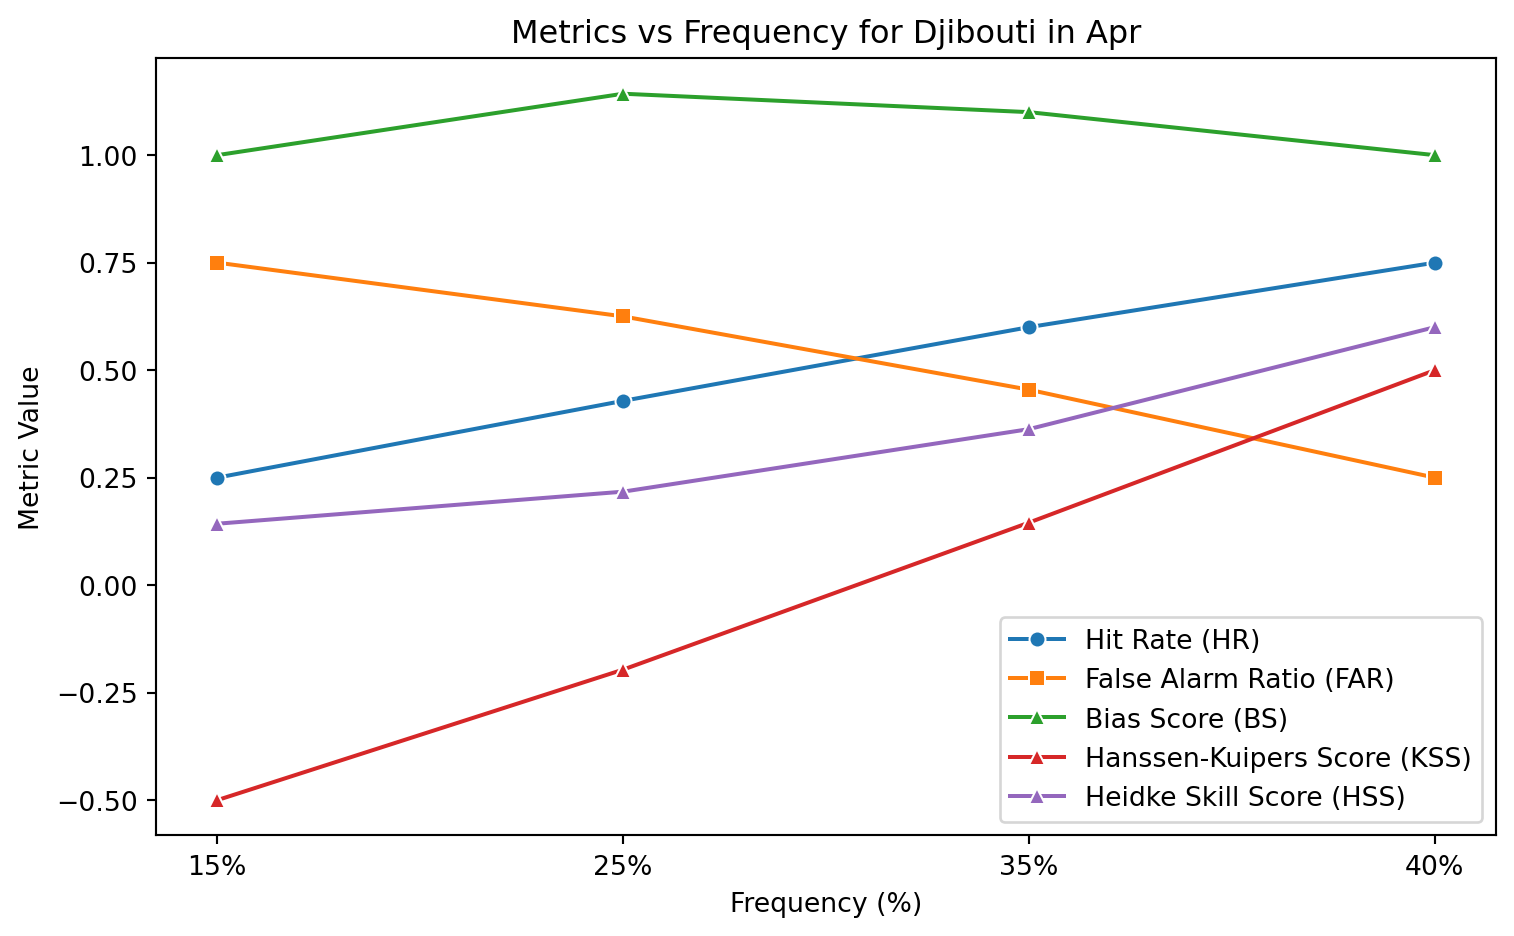

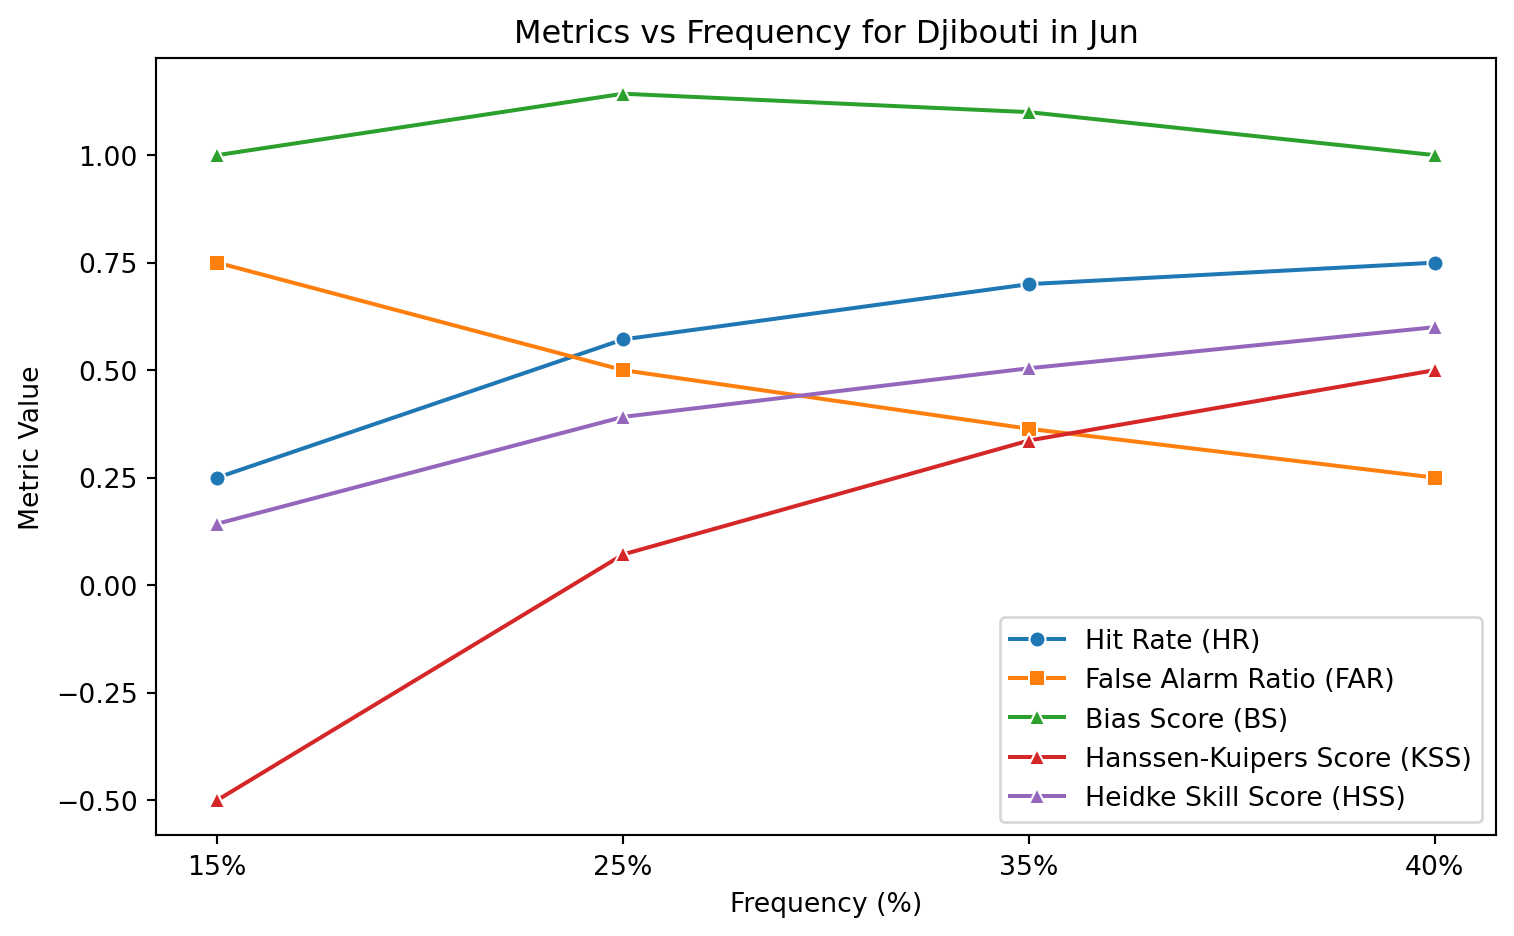

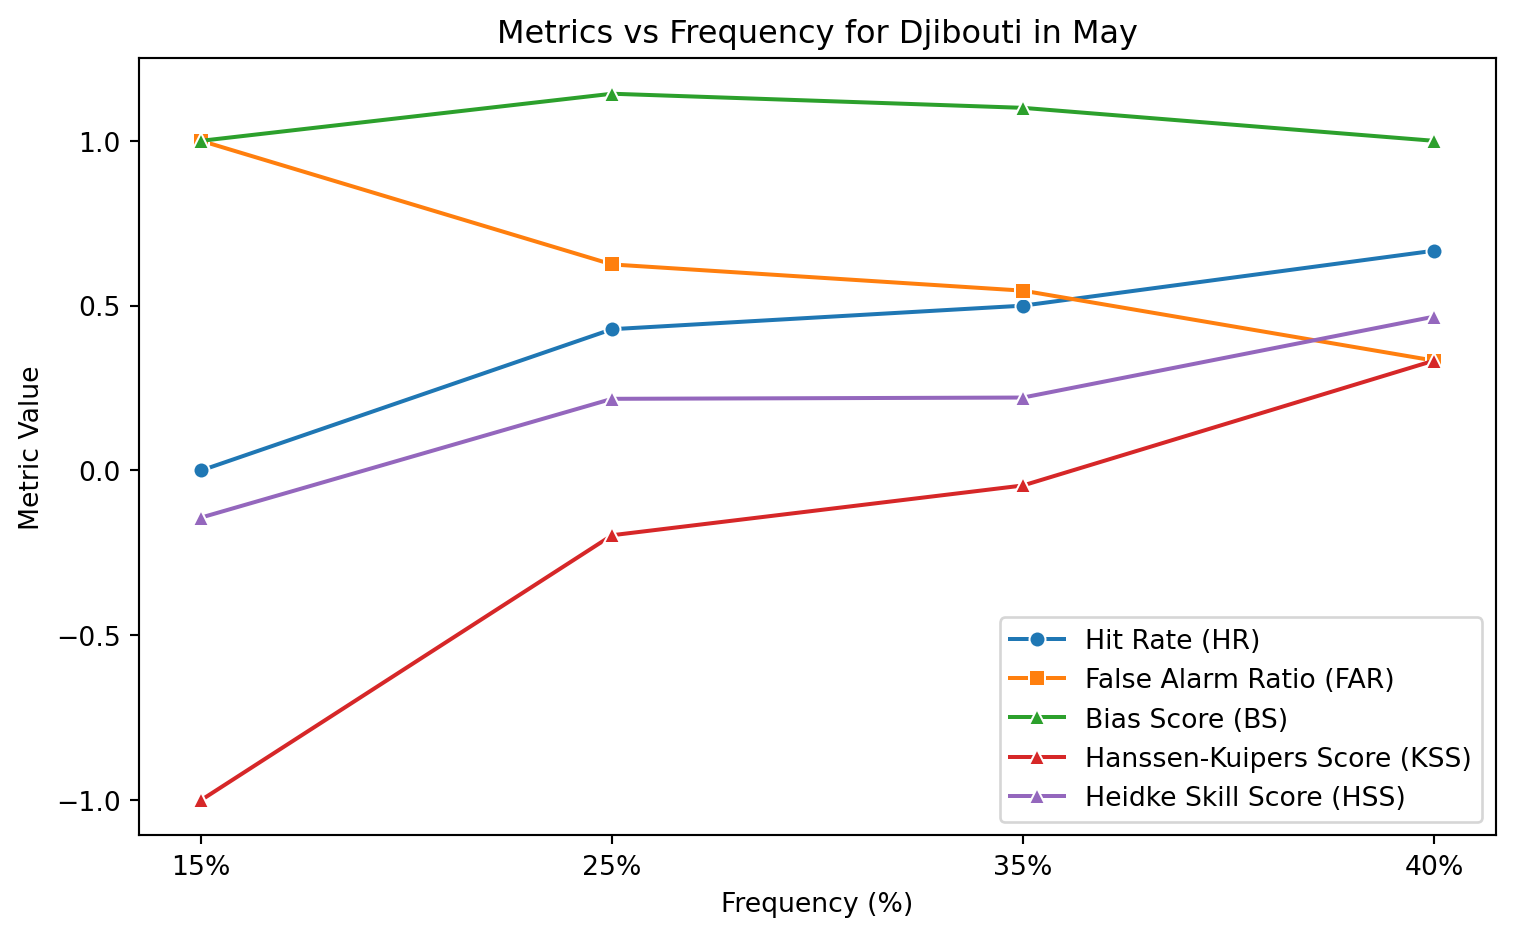

In [13]:
# Plot metrics across different frequencies
u.plot_metrics_by_admin_and_frequency(grouped_data)

#### Classifying Triggers based on Hit Rate (HR) and False Alarm Ratio (FAR)

In [14]:
trigger_classified = u.classify_trigger_HR_vs_FAR(grouped_data, threshold=0.6)

In [15]:
trigger_classified

,Frequency (%),Admin Name,Issue Month,Worthy Action,Act in Vain,Worthy Inaction,Fail to Act,Hit Rate (HR),False Alarm Ratio (FAR),Bias Score (BS),Hanssen-Kuipers Score (KSS),Heidke Skill Score (HSS),Classification
0,15%,Djibouti,Apr,1.0,3.0,25.0,3.0,0.250000,0.750000,1.000000,-0.500000,0.142857,Bad
1,15%,Djibouti,Jun,1.0,3.0,25.0,3.0,0.250000,0.750000,1.000000,-0.500000,0.142857,Bad
2,15%,Djibouti,May,0.0,4.0,24.0,4.0,0.000000,1.000000,1.000000,-1.000000,-0.142857,Bad
3,25%,Djibouti,Apr,3.0,5.0,20.0,4.0,0.428571,0.625000,1.142857,-0.196429,0.217391,Bad
4,25%,Djibouti,Jun,4.0,4.0,21.0,3.0,0.571429,0.500000,1.142857,0.071429,0.391304,Moderate
5,25%,Djibouti,May,3.0,5.0,20.0,4.0,0.428571,0.625000,1.142857,-0.196429,0.217391,Bad
6,35%,Djibouti,Apr,6.0,5.0,17.0,4.0,0.600000,0.454545,1.100000,0.145455,0.362832,Bad
7,35%,Djibouti,Jun,7.0,4.0,18.0,3.0,0.700000,0.363636,1.100000,0.336364,0.504425,Good
8,35%,Djibouti,May,5.0,6.0,16.0,5.0,0.500000,0.545455,1.100000,-0.045455,0.221239,Bad
9,40%,Djibouti,Apr,9.0,3.0,17.0,3.0,0.750000,0.250000,1.000000,0.500000,0.600000,Good


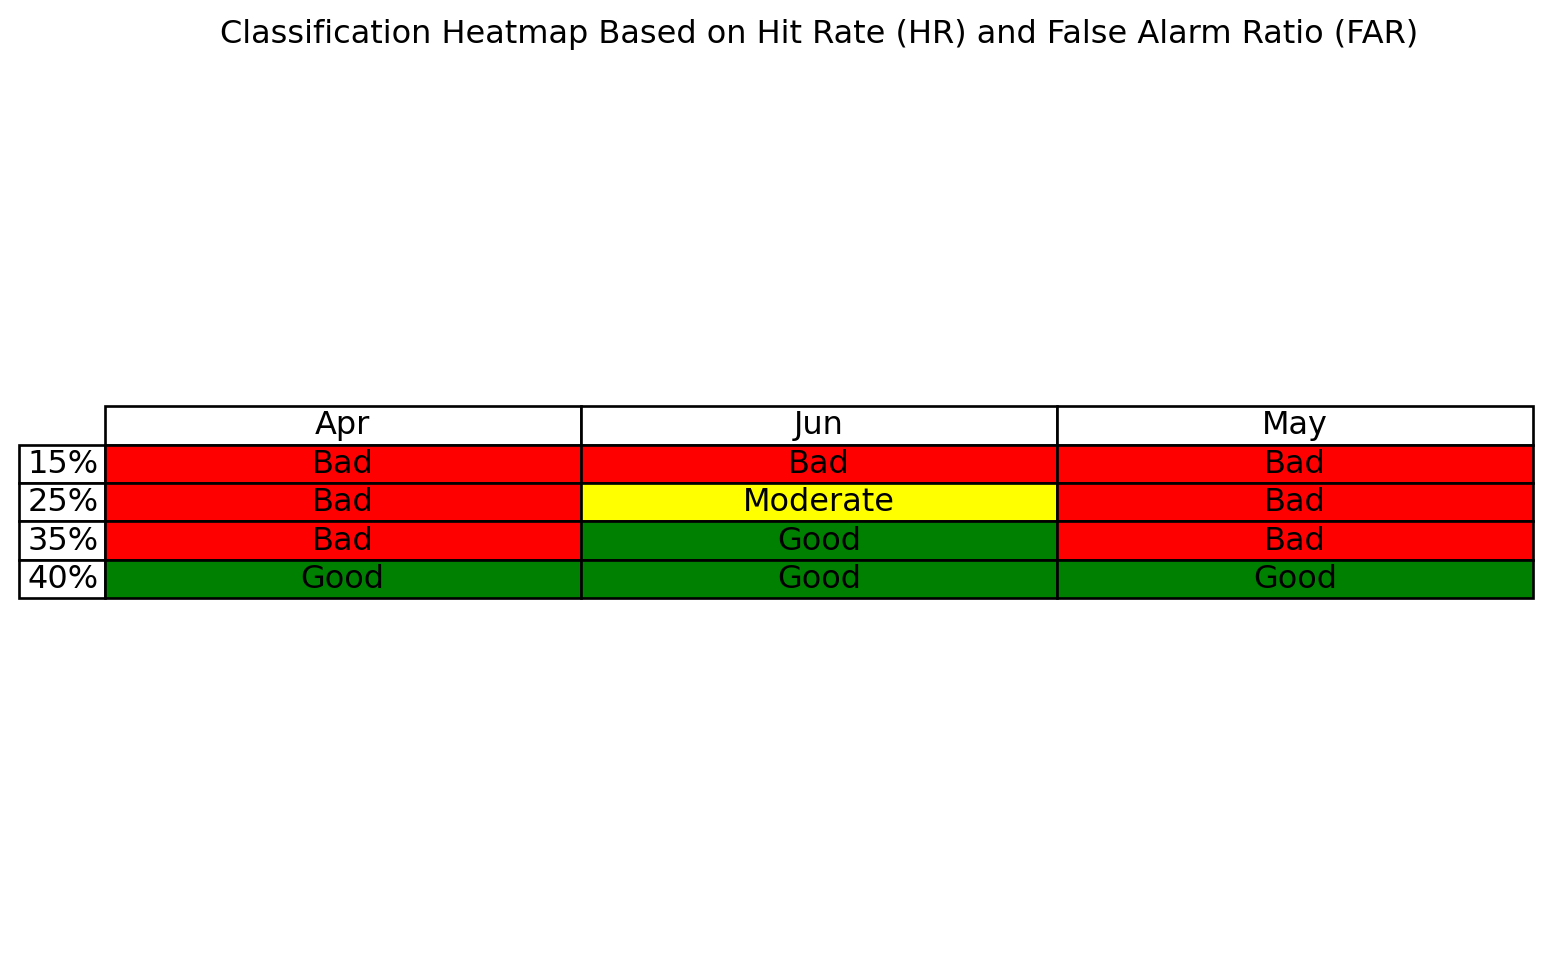

In [16]:
u.plot_HR_FAR_classification_heatmap(trigger_classified)

### Skill Metrics Against Bad Years

In [17]:
# Calling the Design tool API

admin_tables = u.get_trigger_tables(maproom=maproom, mode=mode, season=season, predictor=predictor, bad_years = year,
                                              predictand=predictand_badyears, year = year, issue_month=issue_month, frequencies=frequencies,
                                              include_upcoming=include_upcoming, threshold_protocol=threshold_protocol,
                                              username=username, password=password,need_valid_keys=need_valid_keys,
                                              valid_keys=valid_keys)

combined_admin = pd.concat(admin_tables[f"admin{mode}_tables"].values(), ignore_index=True)

# Reorder the categories
combined_admin['Frequency (%)'] = combined_admin['Frequency (%)'].astype('category')
combined_admin['Frequency (%)'] = combined_admin['Frequency (%)'].cat.reorder_categories(correct_order, ordered=True)

#### Metrics Table

In [18]:
# Group the data by 'Frequency (%)' and 'Admin Name'
grouped_data = combined_admin.groupby(['Frequency (%)', 'Admin Name', 'Issue Month'], observed=True).agg({
    'Worthy Action': lambda x: x.unique()[0],
    'Act in Vain': lambda x: x.unique()[0],
    'Worthy Inaction': lambda x: x.unique()[0],
    'Fail to Act': lambda x: x.unique()[0]
}).reset_index()

grouped_data = u.calculate_forecast_metrics(grouped_data)

u.format_forecast_metrics(grouped_data)

,Frequency (%),Admin Name,Issue Month,Worthy Action,Act in Vain,Worthy Inaction,Fail to Act,Hit Rate (HR),False Alarm Ratio (FAR),Bias Score (BS),Hanssen-Kuipers Score (KSS),Heidke Skill Score (HSS)
0,15%,Djibouti,Apr,1.0,3.0,24.0,4.0,0.20,0.75,0.80,-0.55,0.10
1,15%,Djibouti,Jun,1.0,3.0,24.0,4.0,0.20,0.75,0.80,-0.55,0.10
2,15%,Djibouti,May,0.0,4.0,23.0,5.0,0.00,1.00,0.80,-1.00,-0.16
3,25%,Djibouti,Apr,3.0,5.0,19.0,5.0,0.38,0.62,1.00,-0.25,0.17
4,25%,Djibouti,Jun,5.0,3.0,21.0,3.0,0.62,0.38,1.00,0.25,0.50
5,25%,Djibouti,May,3.0,5.0,19.0,5.0,0.38,0.62,1.00,-0.25,0.17
6,35%,Djibouti,Apr,11.0,0.0,0.0,21.0,0.34,0.00,0.34,0.34,0.00
7,35%,Djibouti,Jun,11.0,0.0,0.0,21.0,0.34,0.00,0.34,0.34,0.00
8,35%,Djibouti,May,11.0,0.0,0.0,21.0,0.34,0.00,0.34,0.34,0.00
9,40%,Djibouti,Apr,12.0,0.0,0.0,20.0,0.38,0.00,0.38,0.38,0.00


In [19]:
grouped_data.to_csv(f"data/metrics{country}_{target_season}_{predictand_badyears}_{admin_level}.csv", index=False)

#### Metrics Summary Statistics

In [20]:
summary_stats = grouped_data.describe().round(2)

summary_stats

,Worthy Action,Act in Vain,Worthy Inaction,Fail to Act,Hit Rate (HR),False Alarm Ratio (FAR),Bias Score (BS),Hanssen-Kuipers Score (KSS),Heidke Skill Score (HSS)
count,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00
mean,6.83,1.92,10.83,12.42,0.33,0.34,0.63,-0.02,0.07
std,5.04,2.11,11.42,8.47,0.15,0.38,0.29,0.48,0.16
min,0.00,0.00,0.00,3.00,0.00,0.00,0.34,-1.00,-0.16
25%,2.50,0.00,0.00,4.75,0.31,0.00,0.37,-0.32,0.00
50%,8.00,1.50,9.50,12.50,0.36,0.19,0.59,0.30,0.00
75%,11.25,3.25,21.50,20.25,0.38,0.66,0.85,0.35,0.11
max,12.00,5.00,24.00,21.00,0.62,1.00,1.00,0.38,0.50


#### Confusion Matrix vs Frequency

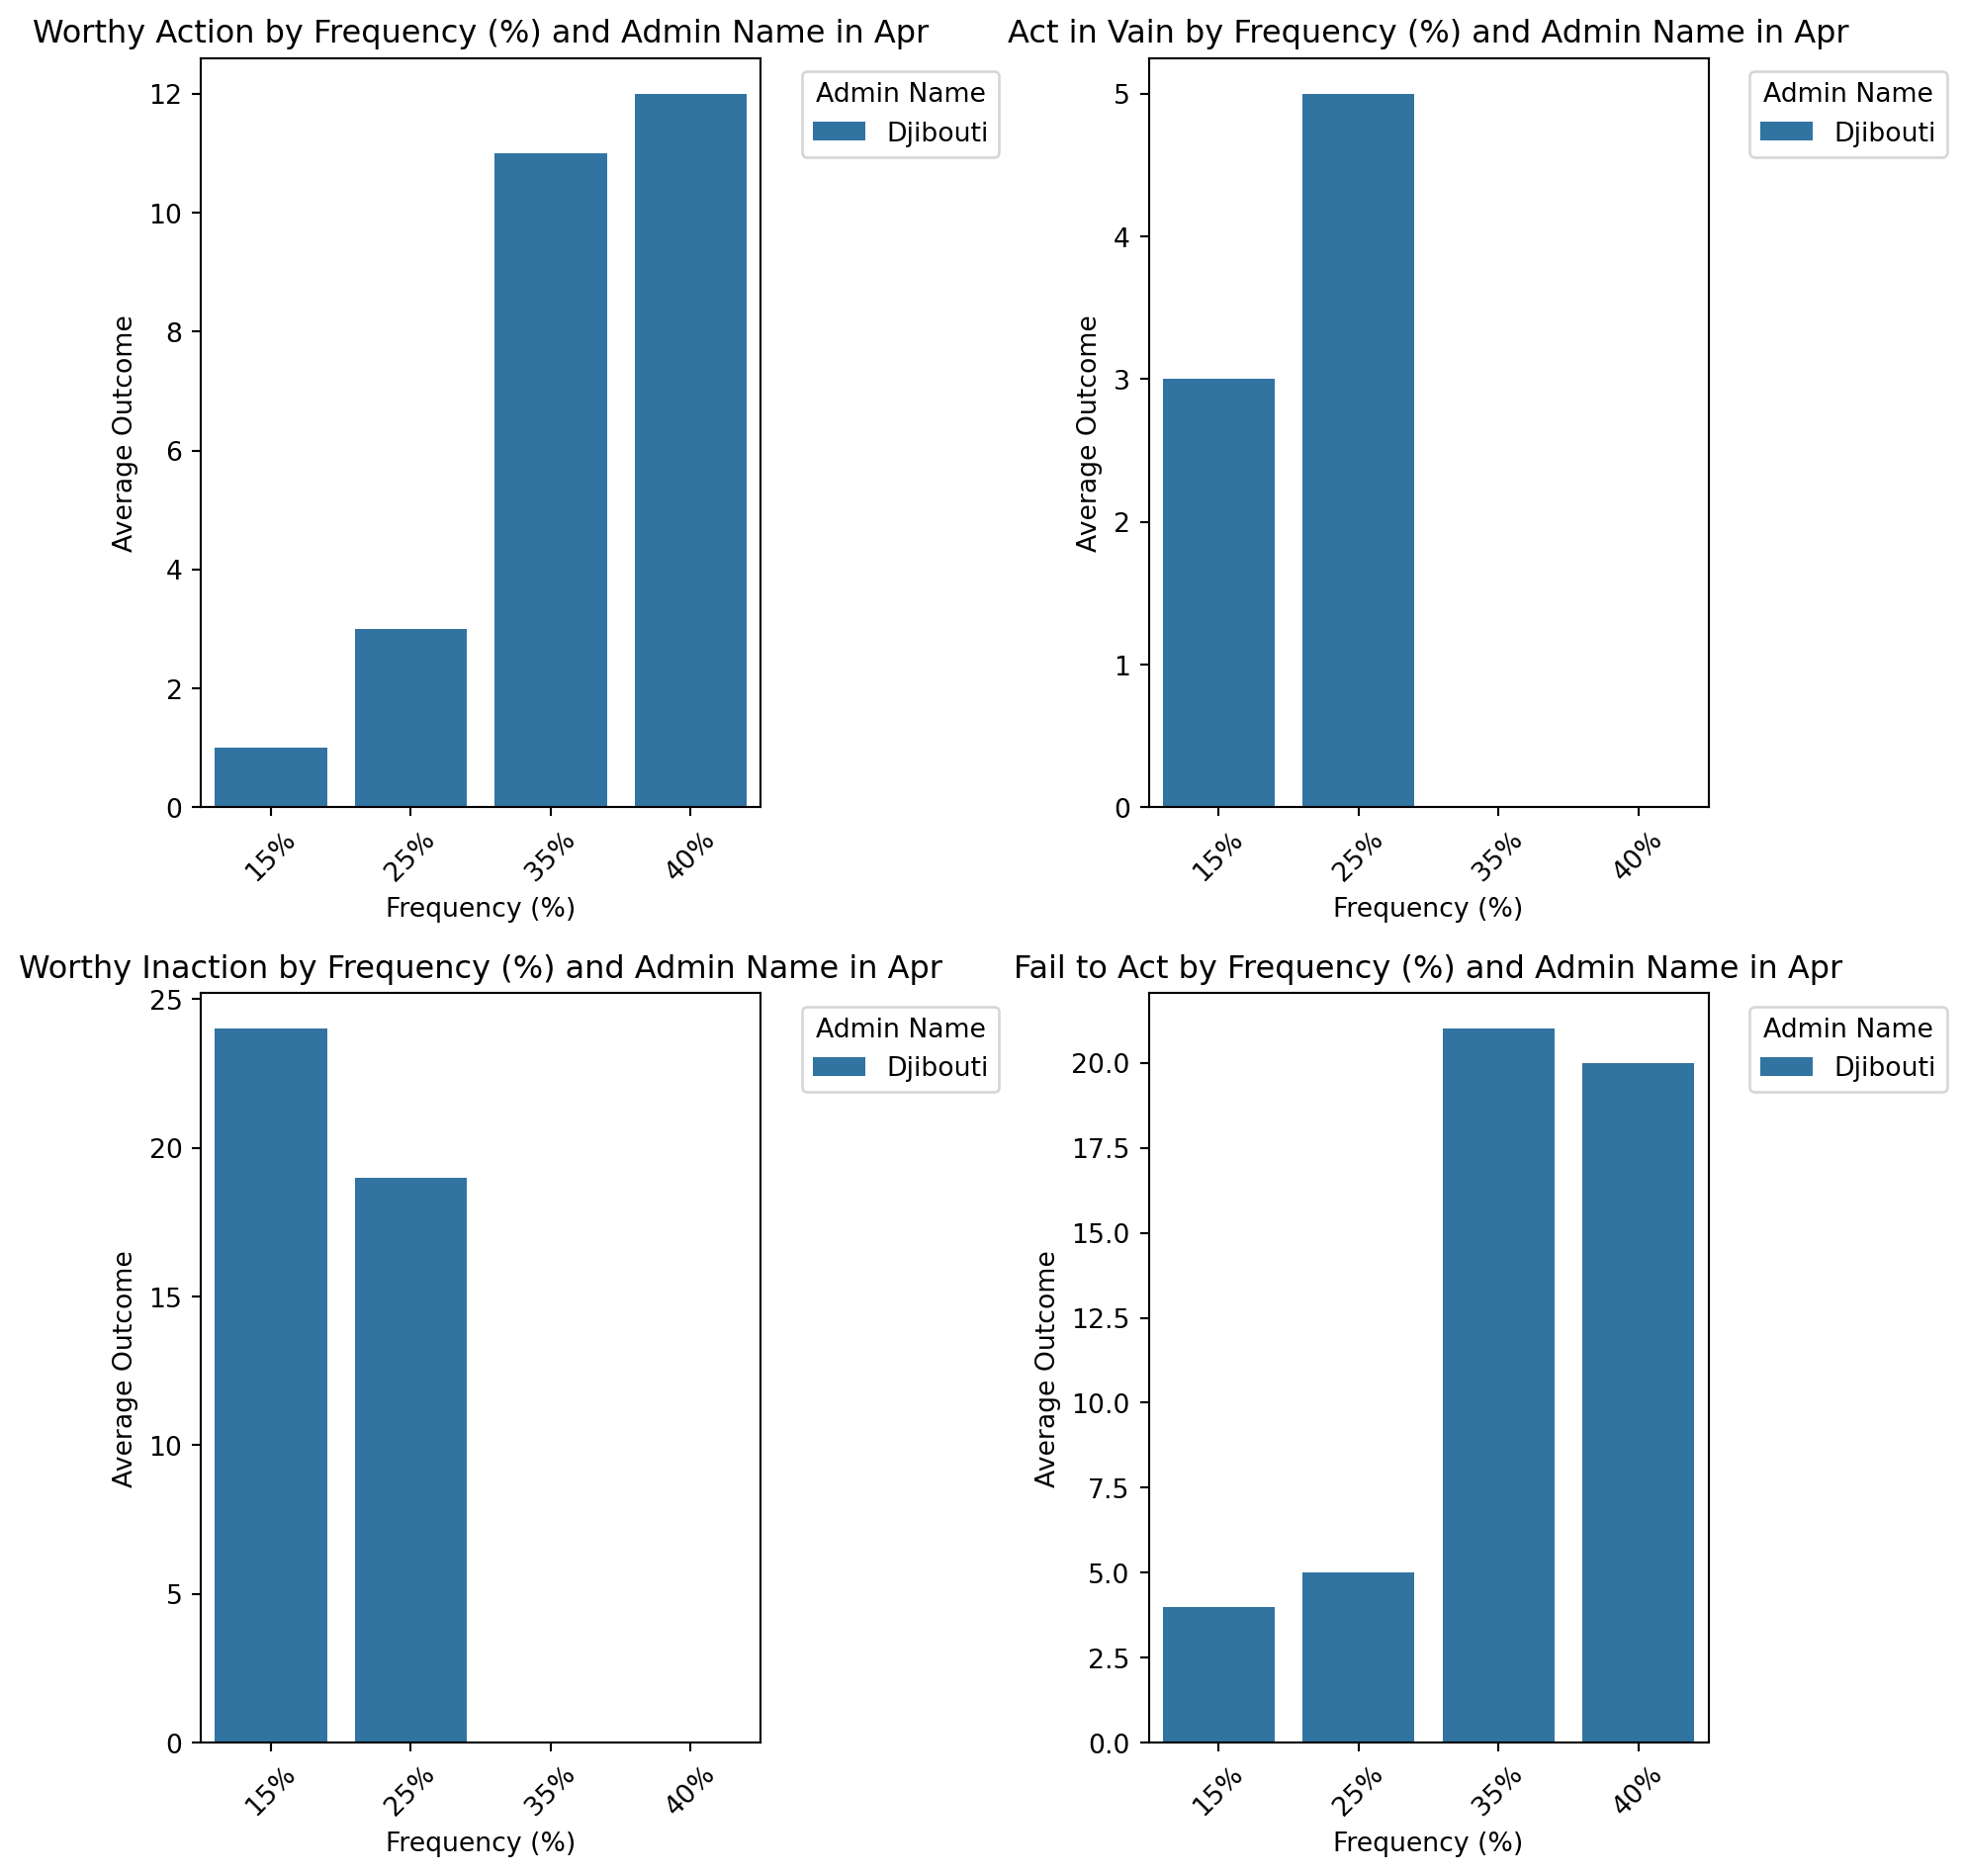

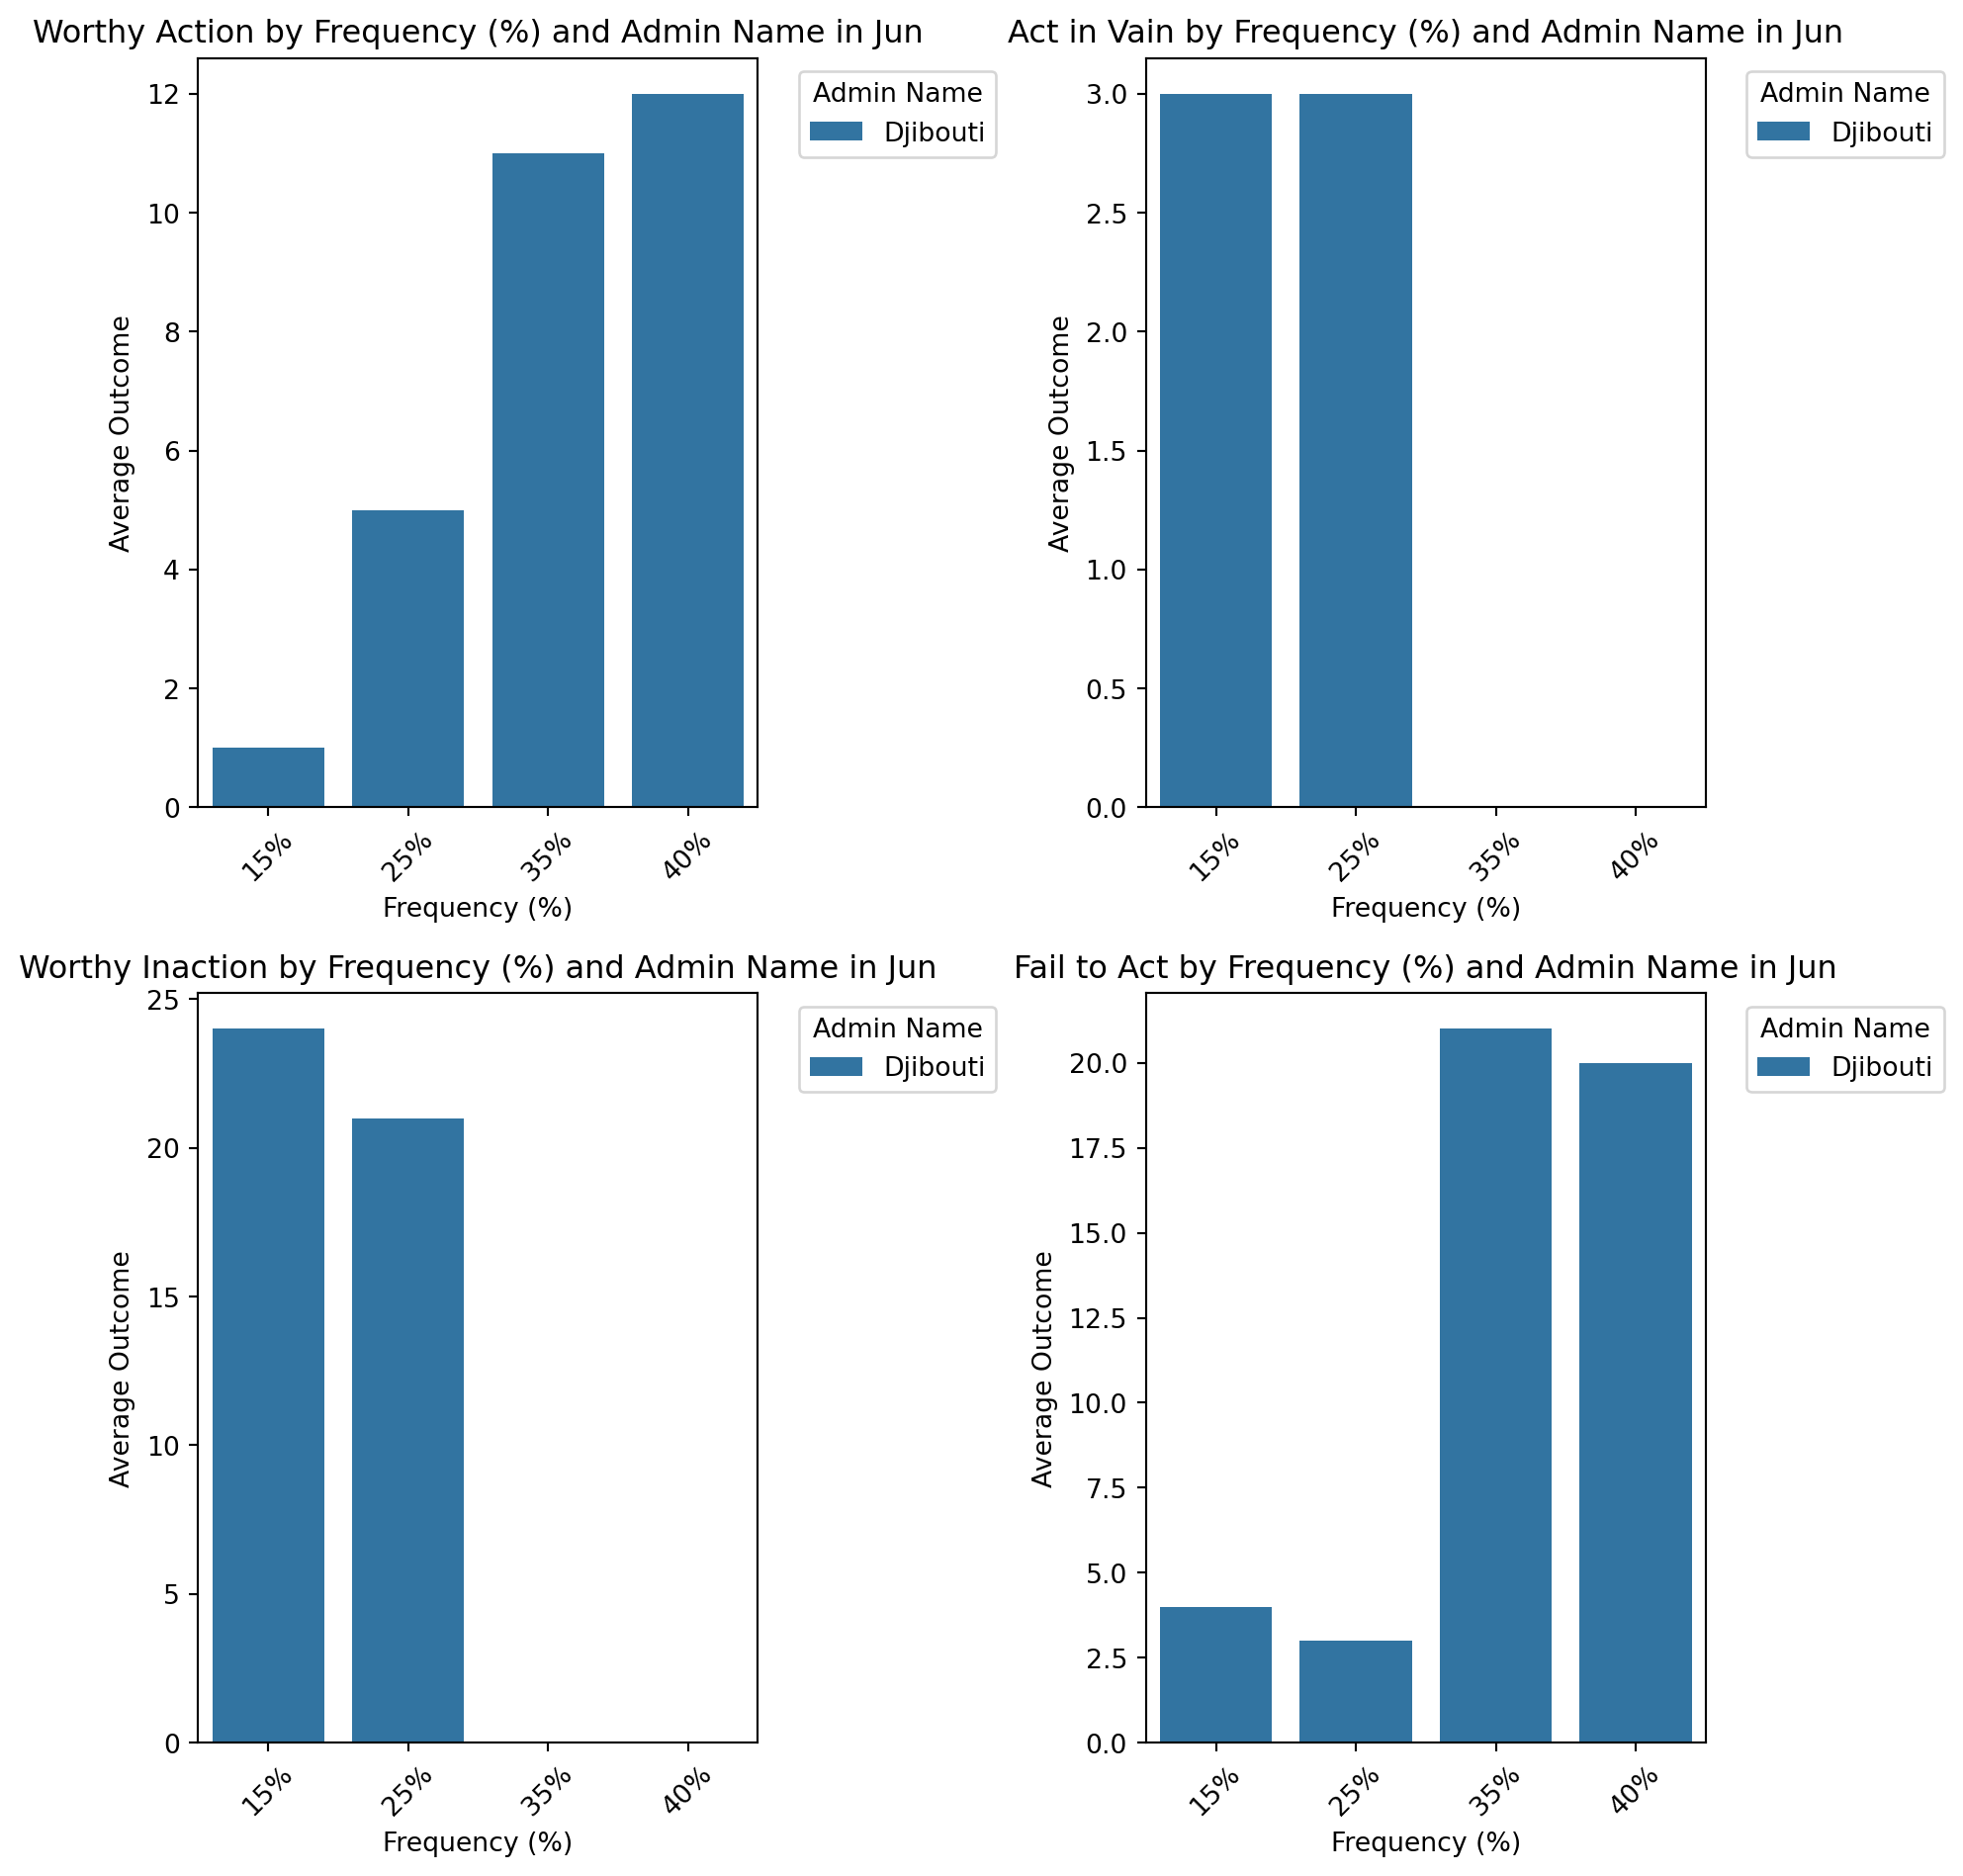

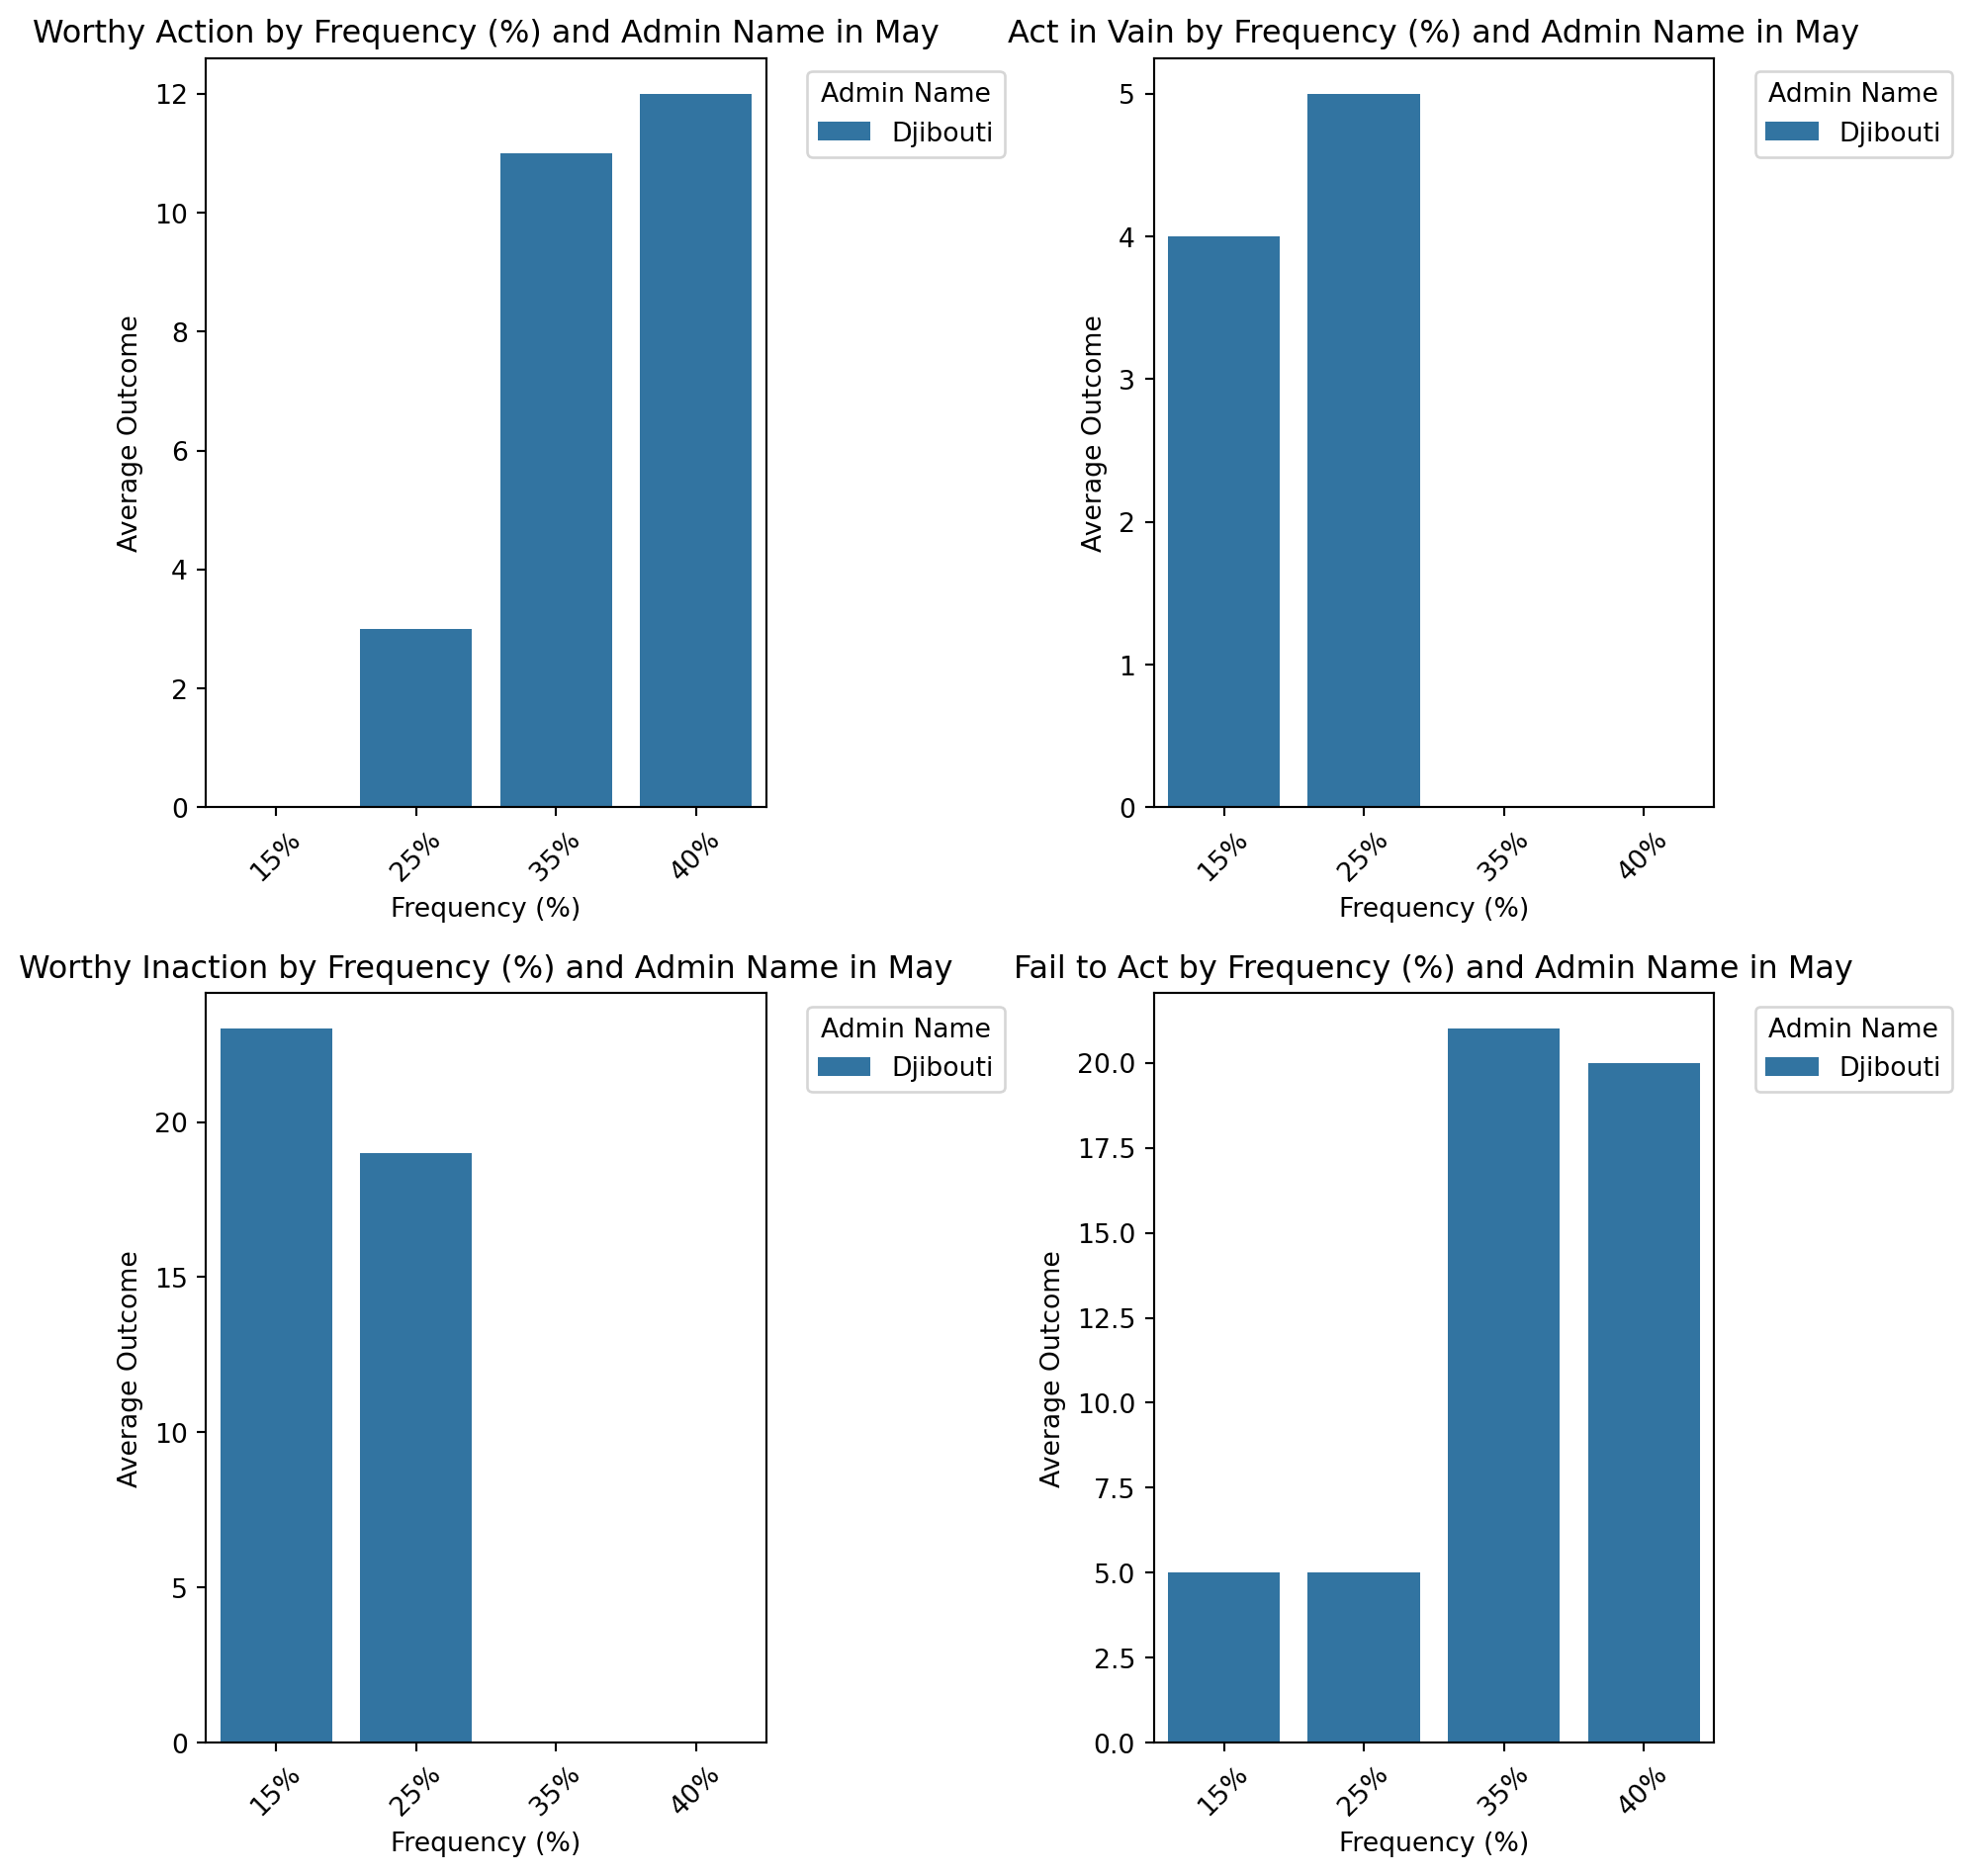

In [21]:
# Visualize Decision Outcomes for each frequency

u.visualize_decision_outcomes(grouped_data)

#### Metrics vs Frequency

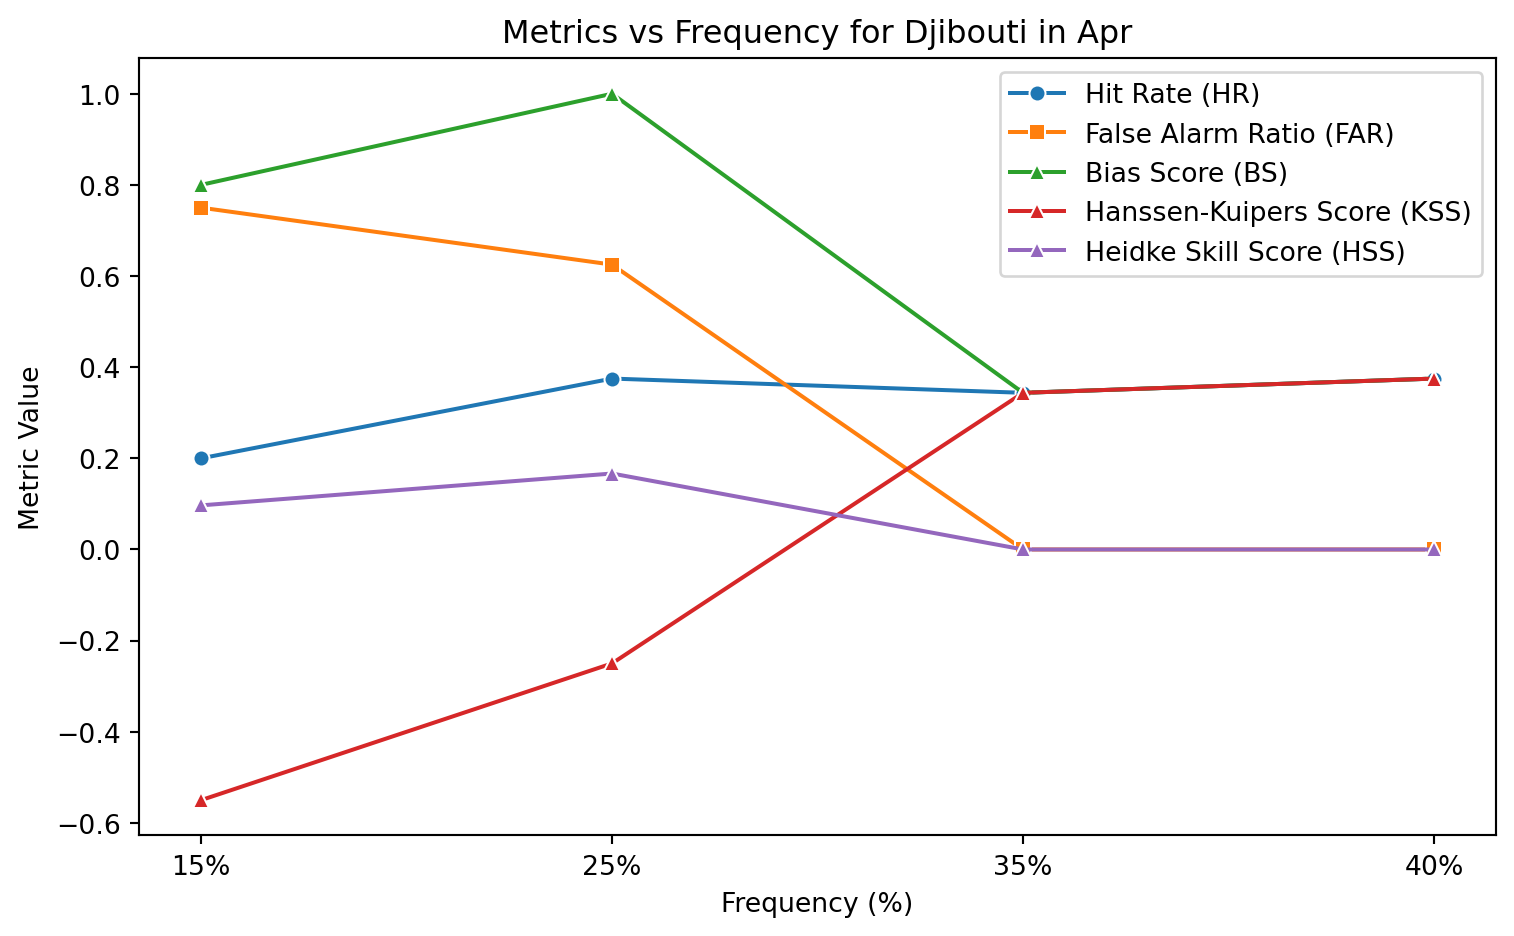

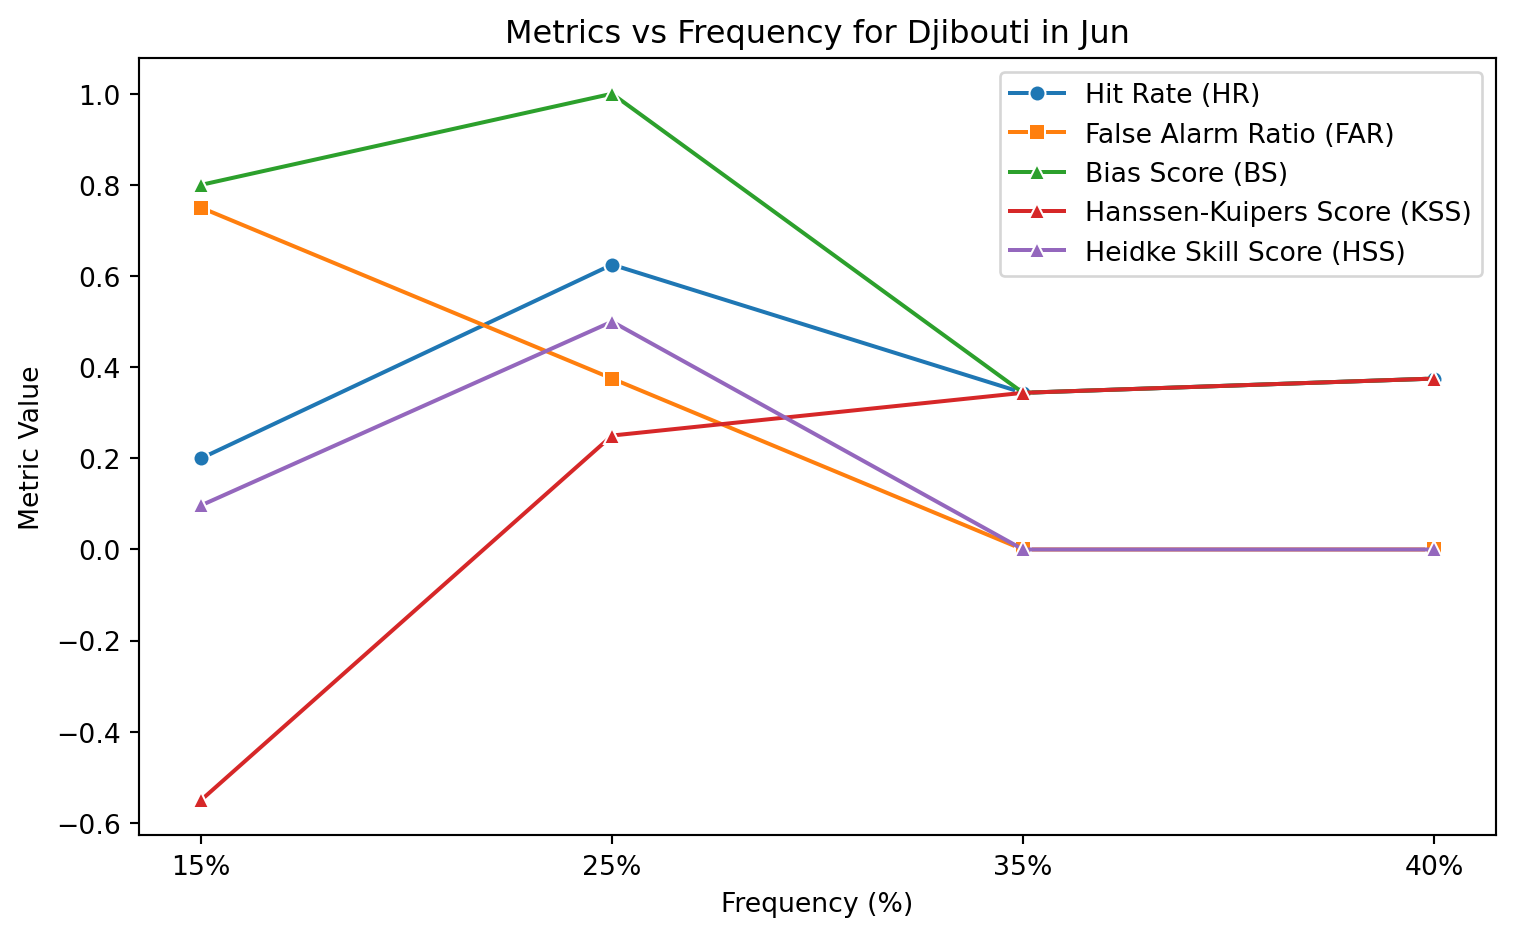

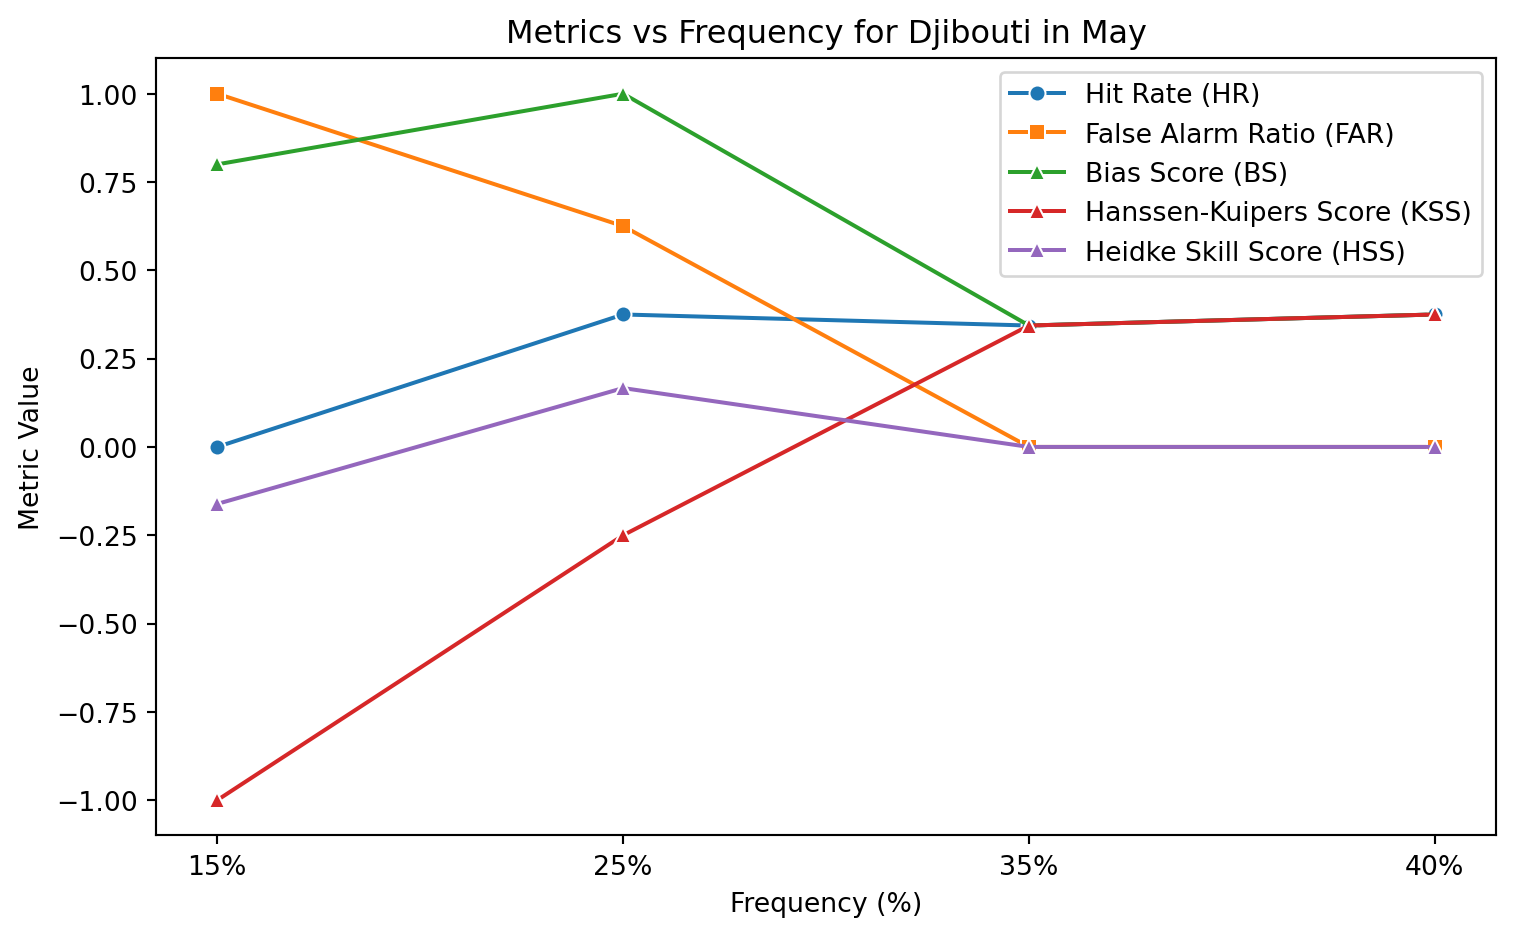

In [22]:
# Plot metrics across different frequencies
u.plot_metrics_by_admin_and_frequency(grouped_data)

#### Classifying Triggers based on Hit Rate (HR) and False Alarm Ratio (FAR)

In [23]:
trigger_classified = u.classify_trigger_HR_vs_FAR(grouped_data, threshold=0.6)

In [24]:
trigger_classified

,Frequency (%),Admin Name,Issue Month,Worthy Action,Act in Vain,Worthy Inaction,Fail to Act,Hit Rate (HR),False Alarm Ratio (FAR),Bias Score (BS),Hanssen-Kuipers Score (KSS),Heidke Skill Score (HSS),Classification
0,15%,Djibouti,Apr,1.0,3.0,24.0,4.0,0.20000,0.750,0.80000,-0.55000,0.096774,Bad
1,15%,Djibouti,Jun,1.0,3.0,24.0,4.0,0.20000,0.750,0.80000,-0.55000,0.096774,Bad
2,15%,Djibouti,May,0.0,4.0,23.0,5.0,0.00000,1.000,0.80000,-1.00000,-0.161290,Bad
3,25%,Djibouti,Apr,3.0,5.0,19.0,5.0,0.37500,0.625,1.00000,-0.25000,0.166667,Bad
4,25%,Djibouti,Jun,5.0,3.0,21.0,3.0,0.62500,0.375,1.00000,0.25000,0.500000,Good
5,25%,Djibouti,May,3.0,5.0,19.0,5.0,0.37500,0.625,1.00000,-0.25000,0.166667,Bad
6,35%,Djibouti,Apr,11.0,0.0,0.0,21.0,0.34375,0.000,0.34375,0.34375,0.000000,Moderate
7,35%,Djibouti,Jun,11.0,0.0,0.0,21.0,0.34375,0.000,0.34375,0.34375,0.000000,Moderate
8,35%,Djibouti,May,11.0,0.0,0.0,21.0,0.34375,0.000,0.34375,0.34375,0.000000,Moderate
9,40%,Djibouti,Apr,12.0,0.0,0.0,20.0,0.37500,0.000,0.37500,0.37500,0.000000,Moderate


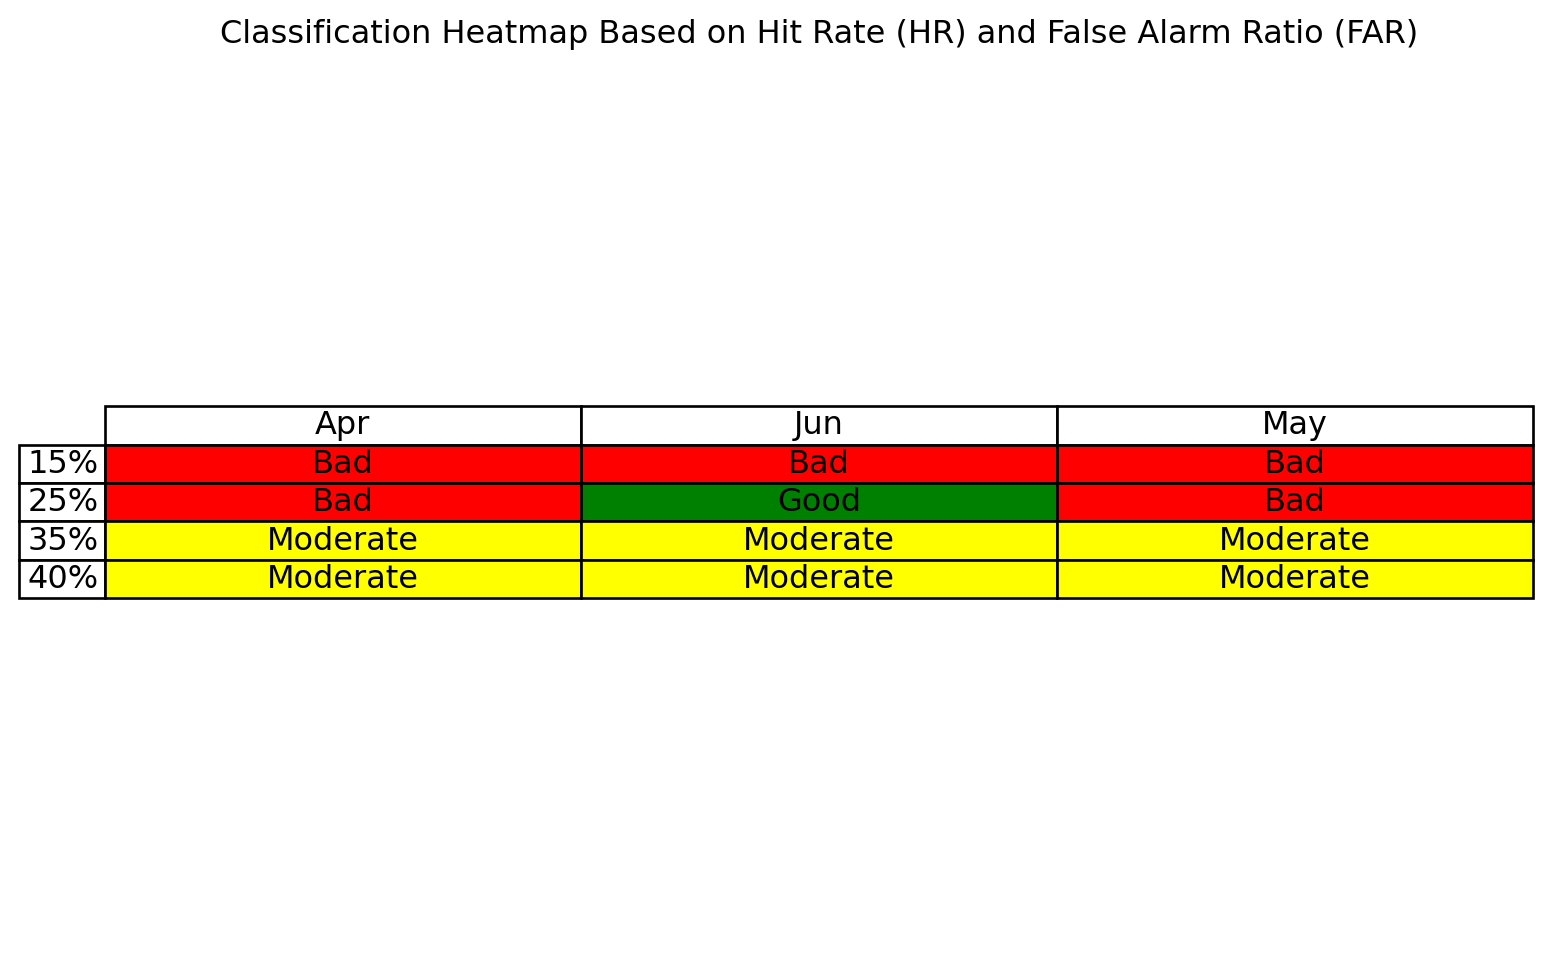

In [25]:
u.plot_HR_FAR_classification_heatmap(trigger_classified)